In [1]:
from HeaderP import *

In [2]:
import pylab
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import os, pickle
import pynbody as pb

### Figure 1

In [3]:
def readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread):
    if simNo=='data':
        data=pd.read_pickle('../../SecondYear/CannonDR16_cut.pkl')
        data['z_today']=data['z']
        data['x_today']=data['X']
        data['y_today']=data['Y']
        data['feh_scale']=data['M_H']
        data['ofe_scale']=data['O_FE']
        data['age']=data['Age']
    elif select:
        data=pd.read_pickle('../Data/Buck_g'+simNo+'_apogee_selec.pkl')
        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    
    elif not select:
        if z=='0':
            data=pd.read_pickle('../Data/Buck_g'+simNo+'.pkl')
        else:
            data=pd.read_pickle('../Data/Buck_g'+simNo+'_z'+z+'.pkl')
            try:
                data['x_today']=data['x']
                data['y_today']=data['y']
                data['z_today']=data['z']
            except:
                print(np.shape(data['x_today']))

        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        
        if Rcut:
            data=data.loc[data['R_bir']<Rcut_thread].reset_index(drop=True)
            data=data.loc[abs(data['z_birth'])<zcut_thread].reset_index(drop=True)
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    return data
        

In [4]:
simNo='2_79e12'
z='0'
Rcut=True
select=True
Rcut_thread=30
zcut_thread=5


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

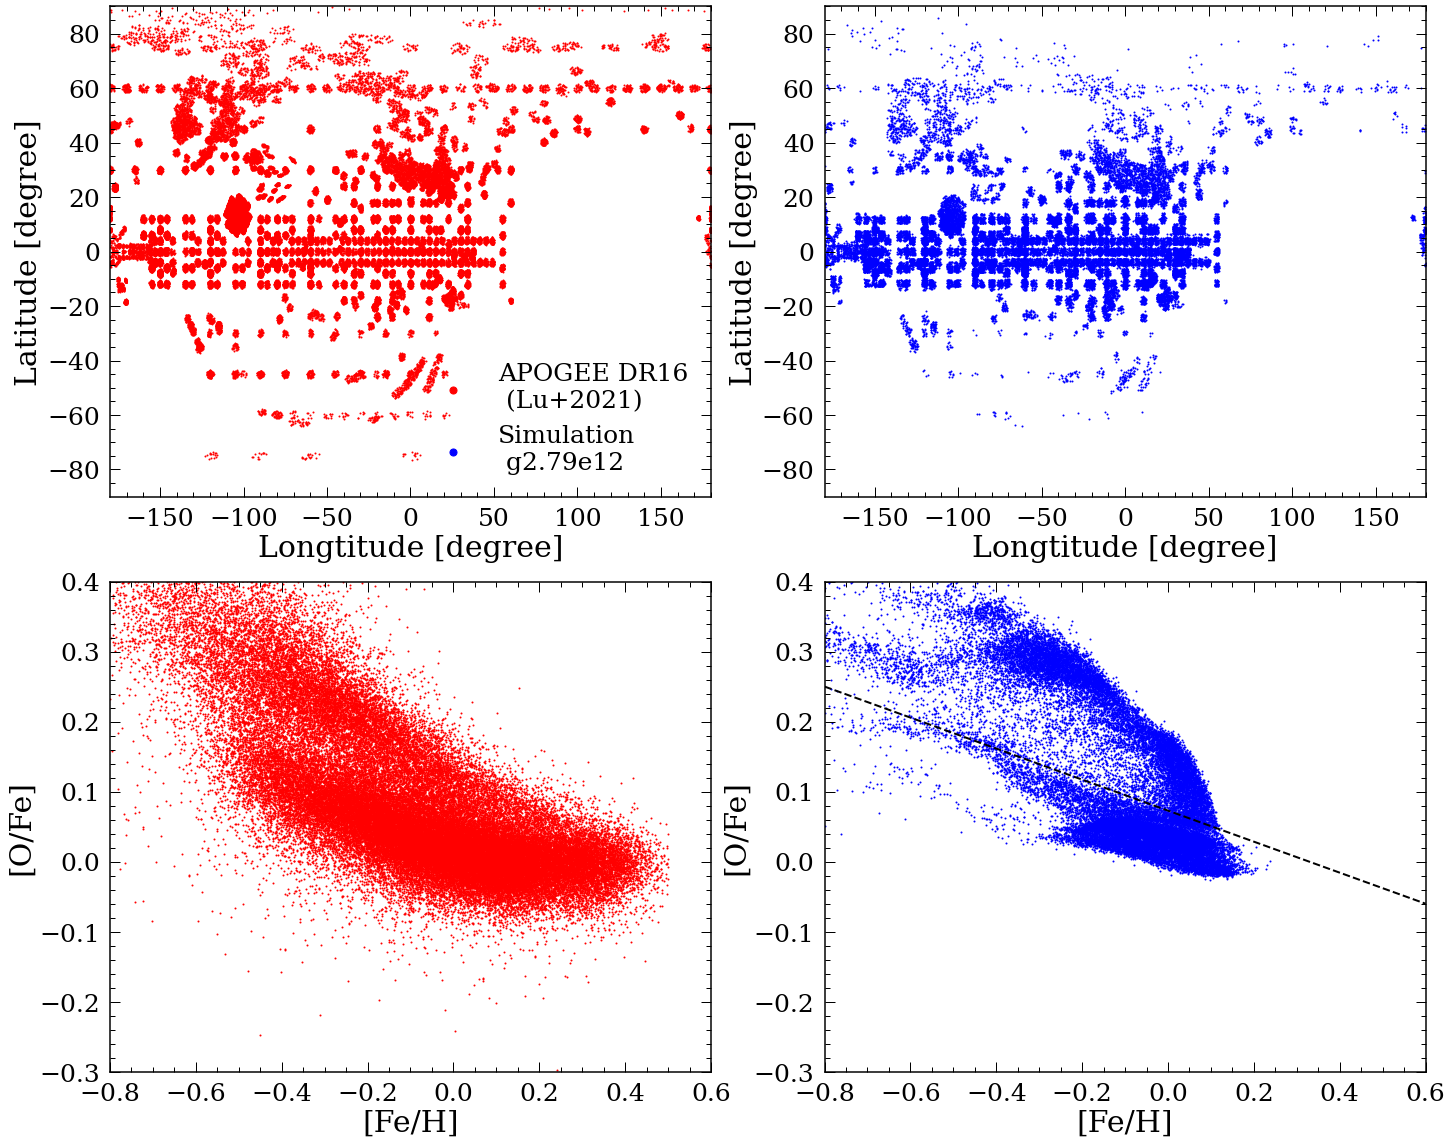

In [5]:
df=pd.read_pickle('../../SecondYear/CannonDR16_cut.pkl')
#p=fitpoints([-0.8,0.6],[0.105,0.005])
p=fitpoints([-0.8,0.6],[0.25,-0.06])
df['GLON']=df['GLON']-180
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.scatter(df['GLON'],df['GLAT'],s=1,c='r')
plt.scatter([-999],[-999],s=50,c='r',label='APOGEE DR16\n (Lu+2021)')
plt.scatter([-999],[-999],s=50,c='b',label='Simulation\n g2.79e12')
plt.xlabel('Longtitude [degree]')
plt.ylabel('Latitude [degree]')
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.legend(loc=4)


plt.subplot(2,2,2)
plt.scatter(data['l'],data['b'],s=1,c='b')
plt.xlabel('Longtitude [degree]')
plt.ylabel('Latitude [degree]')
plt.xlim([-180,180])
plt.ylim([-90,90])


plt.subplot(2,2,3)
plt.scatter(df['M_H'],df['O_FE'],s=1,c='r')
scale_fe=np.std(df['M_H'])/np.std(data['feh'])
scale_o=np.std(df['O_FE'])/np.std(data['ofe'])
plt.xlim([-0.8,0.6])
plt.ylim([-0.3,0.4])
plt.ylabel('[O/Fe]')
plt.xlabel('[Fe/H]')


data['feh_scale']=data['feh']*scale_fe+np.median(df['M_H'])-np.median(data['feh'])
data['ofe_scale']=data['ofe']*scale_o+np.median(df['O_FE'])-np.median(data['ofe'])

plt.subplot(2,2,4)
plt.scatter(data['feh_scale'],data['ofe_scale'],s=1,c='b')
plt.plot([-0.8,0.6],p([-0.8,0.6]),'k--')
plt.ylabel('[O/Fe]')
plt.xlabel('[Fe/H]')
plt.xlim([-0.8,0.6])
plt.ylim([-0.3,0.4])
plt.tight_layout()
plt.savefig('selection.png')

### Figure 2

In [6]:
data['hi_low']=data['ofe_scale']-p(data['feh_scale'])>0

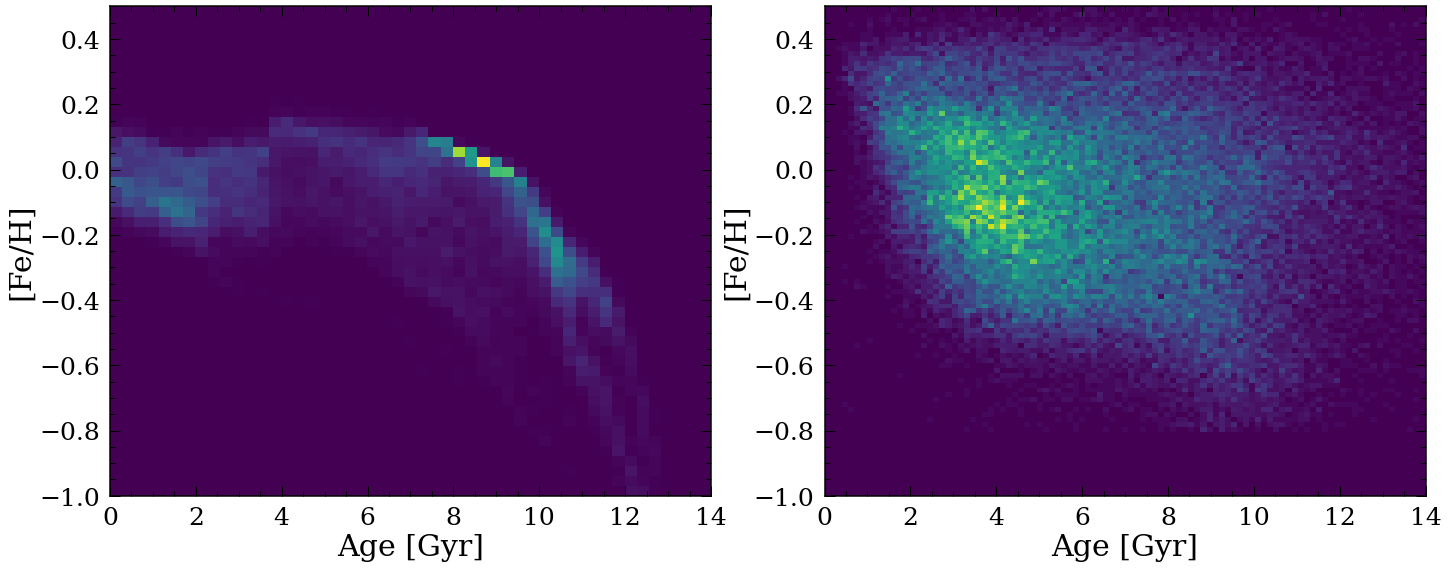

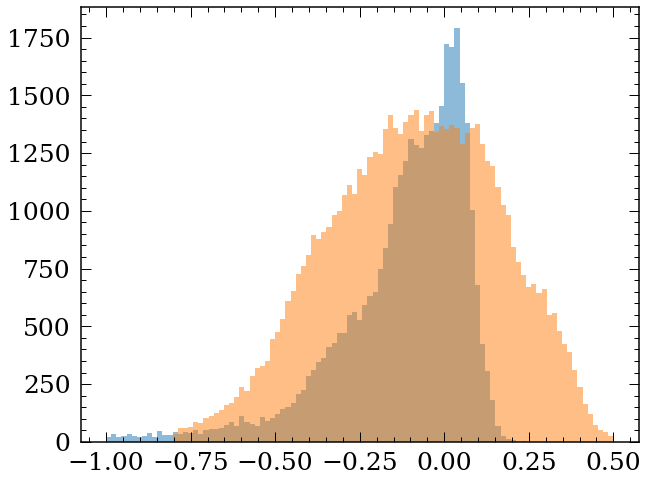

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist2d(data['age'],data['feh_scale'],bins=[np.linspace(0,14,50),np.linspace(-1,0.5,50)],
           density=True);
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.subplot(1,2,2)
plt.hist2d(df['Age'],df['M_H'],bins=[np.linspace(0,14,100),np.linspace(-1,0.5,100)],
           density=True);
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.tight_layout()

plt.figure(figsize=(10,8))
plt.hist(data['feh_scale'],np.linspace(-1,0.5,100),alpha=0.5);
plt.hist(df['M_H'],np.linspace(-1,0.5,100),alpha=0.5);

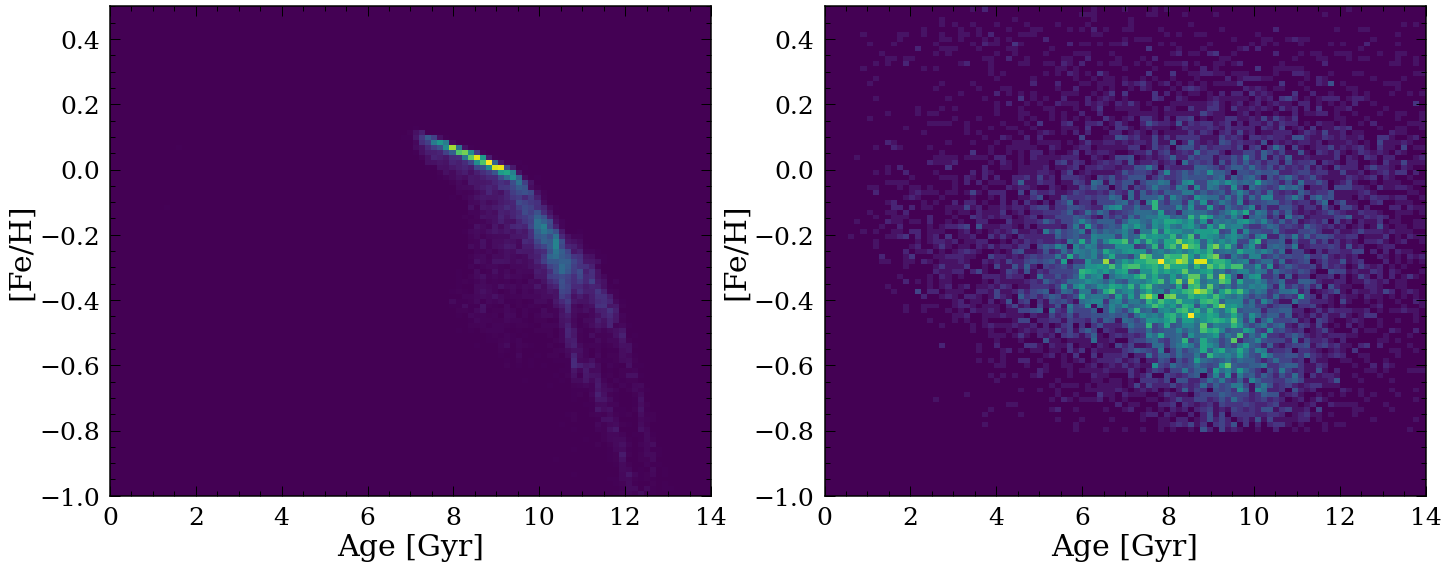

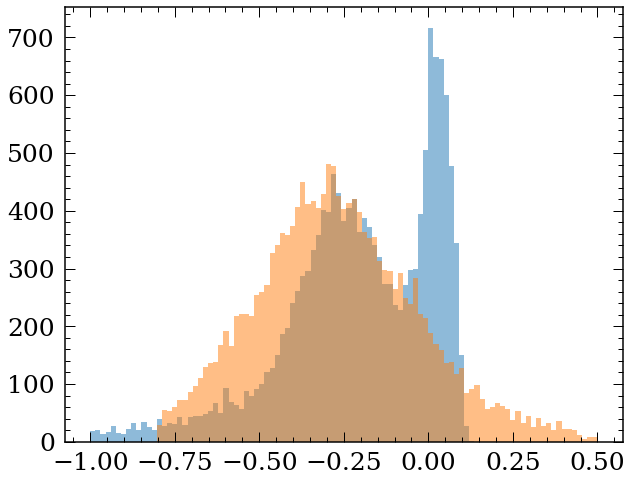

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
data_hi=data.loc[data['hi_low']==1]
plt.hist2d(data_hi['age'],data_hi['feh_scale'],bins=[np.linspace(0,14,100),np.linspace(-1,0.5,100)],
           density=True);
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.xlim([0,14])
plt.ylim([-1,0.5])
plt.subplot(1,2,2)
df_hi=df.loc[df['hi_low_line']==1]
plt.hist2d(df_hi['Age'],df_hi['M_H'],bins=[np.linspace(0,14,100),np.linspace(-1,0.5,100)],
           density=True);
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.xlim([0,14])
plt.ylim([-1,0.5])
plt.tight_layout()

plt.figure(figsize=(10,8))
plt.hist(data_hi['feh_scale'],np.linspace(-1,0.5,100),alpha=0.5);
plt.hist(df_hi['M_H'],np.linspace(-1,0.5,100),alpha=0.5);

/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm


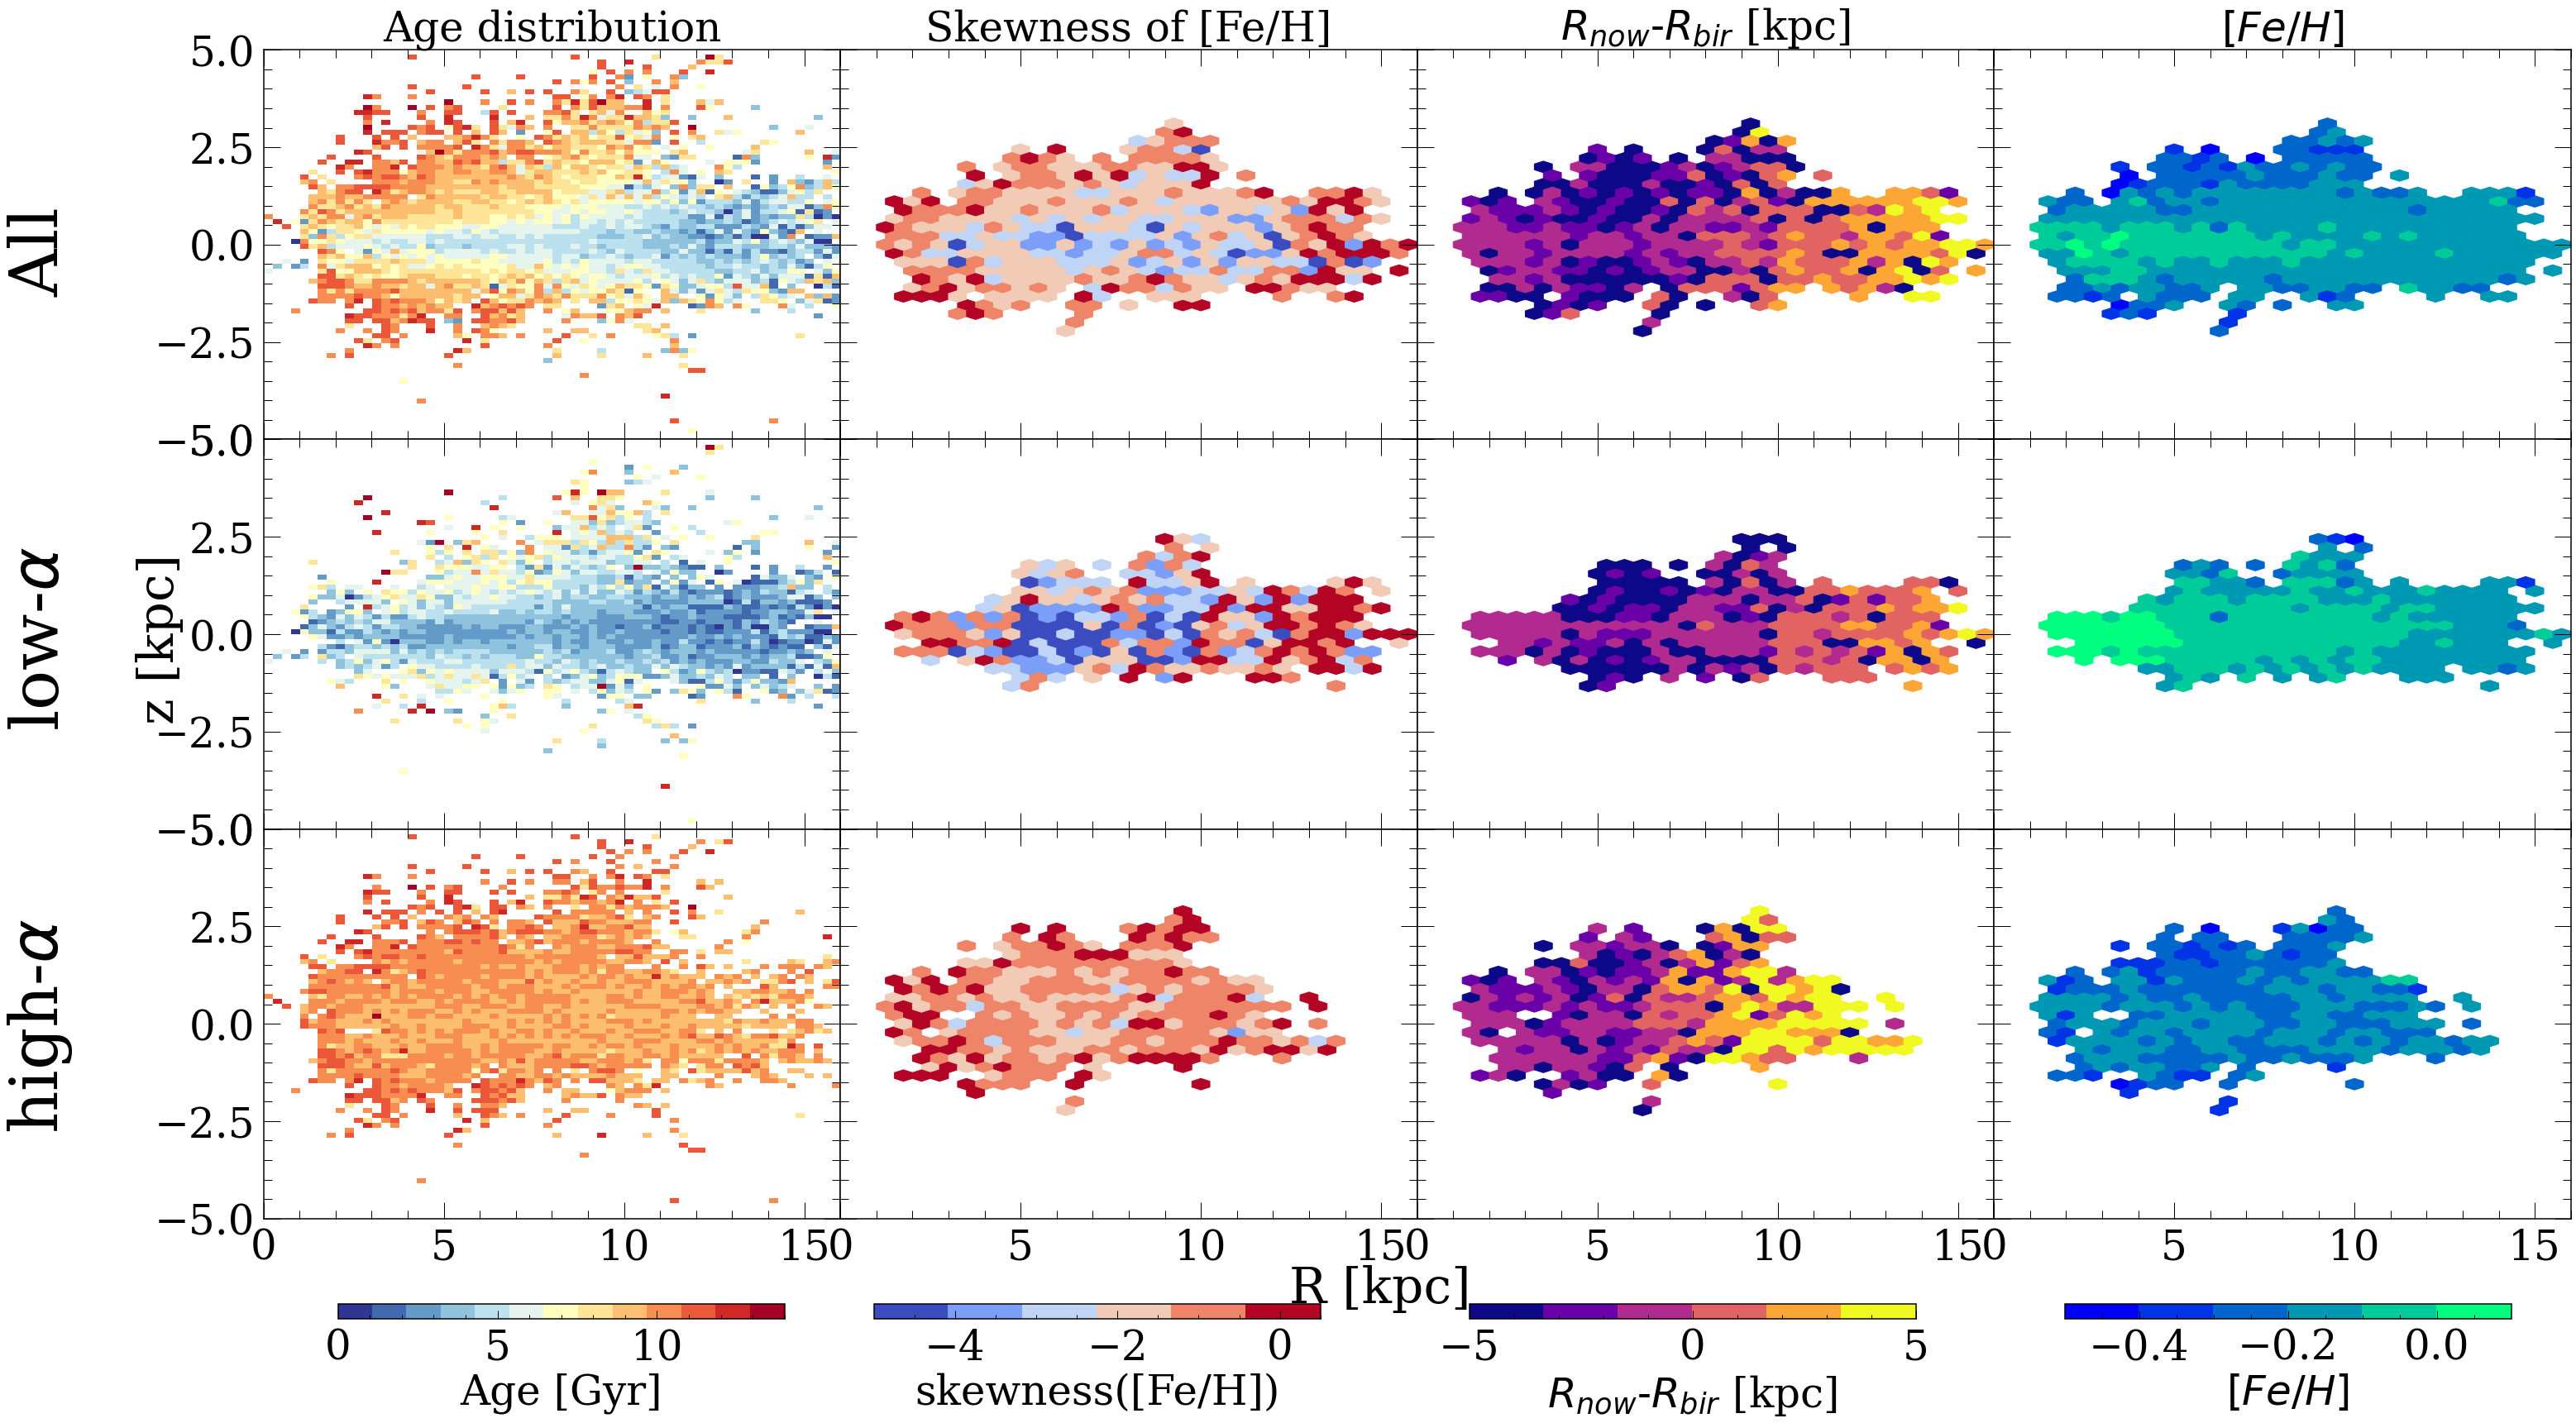

In [9]:
import scipy
x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

minsk=-5
maxsk=0.5

fig, axarr = plt.subplots(3,4,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(25*4/2,26))


######################   skewness  ###################### 
cm = plt.cm.get_cmap('coolwarm',6)
im=axarr[0,1].hexbin(data['R'].values,data['z_today'].values,C=data['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = scipy.stats.skew,mincnt=10)
axarr[0,1].set_xlim([0,16])
axarr[0,1].set_ylim([-5,5])
axarr[0,1].set_title('Skewness of [Fe/H]',fontsize=50)
axarr[0,1].set_yticklabels([])
axarr[0,1].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[0,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)



im=axarr[1,1].hexbin(data.loc[data['hi_low']==0]['R'].values,data.loc[data['hi_low']==0]['z_today'].values,
                     C=data.loc[data['hi_low']==0]['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = scipy.stats.skew,mincnt=10)
axarr[1,1].set_yticklabels([])
axarr[1,1].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[1,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[1,1].set_ylim([-5,5])
axarr[1,1].set_xlim([0,16])

im=axarr[2,1].hexbin(data.loc[data['hi_low']==1]['R'].values,data.loc[data['hi_low']==1]['z_today'].values,
                     C=data.loc[data['hi_low']==1]['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = scipy.stats.skew,mincnt=10)
axarr[2,1].set_yticklabels([])
axarr[2,1].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[2,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[2,1].set_ylim([-5,5])
axarr[2,1].set_xlim([0,16])

cb_ax = fig.add_axes([0.33, 0.06, 0.15, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('skewness([Fe/H])',fontsize = 50,labelpad = 5)
cbar.ax.tick_params(labelsize=50) 
######################   skewness  ###################### 




######################   age  ###################### 
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(data['R'].values,data['z_today'].values,
                data['age'].values,lims, binnum)
axarr[0,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=14,label=('%d Stars'%len(data)))
axarr[0,0].set_title('Age distribution',fontsize=50)
axarr[0,0].set_xticklabels([])
axarr[0,0].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[0,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[0,0].set_ylim([-5,5])
axarr[0,0].set_xlim([0,16])

image=makeagemap_each(data.loc[data['hi_low']==0]['R'].values,data.loc[data['hi_low']==0]['z_today'].values,
                data['age'].loc[data['hi_low']==0].values,lims, binnum)
im=axarr[1,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=14,label=('%d Stars'%len(data['hi_low']==0)))
axarr[1,0].set_xticklabels([])
axarr[1,0].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[1,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[1,0].set_ylim([-5,5])
axarr[1,0].set_xlim([0,16])

image=makeagemap_each(data.loc[data['hi_low']==1]['R'].values,data.loc[data['hi_low']==1]['z_today'].values,
                data['age'].loc[data['hi_low']==1].values,lims, binnum)
axarr[2,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=14,label=('%d Stars'%len(data['hi_low']==1)))
axarr[2,0].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[2,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[2,0].set_ylim([-5,5])
axarr[2,0].set_xlim([0,16])


cb_ax = fig.add_axes([0.15, 0.06, 0.15, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)
cbar.ax.tick_params(labelsize=50) 

fig.text(0.09, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=60)
fig.text(0.5, 0.08, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=60)
######################   age  ###################### 




######################   migration  ###################### 
minsk=-5
maxsk=5
cm = plt.cm.get_cmap('plasma',6)
im=axarr[0,2].hexbin(data['R'].values,data['z_today'].values,C=data['dR'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[0,2].set_title('$R_{now}$-$R_{bir}$ [kpc]',fontsize=50)
axarr[0,2].set_yticklabels([])
axarr[0,2].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[0,2].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[0,2].set_ylim([-5,5])
axarr[0,2].set_xlim([0,16])

im=axarr[1,2].hexbin(data.loc[data['hi_low']==0]['R'].values,data.loc[data['hi_low']==0]['z_today'].values,
                     C=data.loc[data['hi_low']==0]['dR'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[1,2].set_yticklabels([])
axarr[1,2].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[1,2].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[1,2].set_ylim([-5,5])
axarr[1,2].set_xlim([-0,16])

im=axarr[2,2].hexbin(data.loc[data['hi_low']==1]['R'].values,data.loc[data['hi_low']==1]['z_today'].values,
                     C=data.loc[data['hi_low']==1]['dR'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[2,2].set_yticklabels([])
axarr[2,2].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[2,2].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[2,2].set_ylim([-5,5])
axarr[2,2].set_xlim([0,16])


cb_ax = fig.add_axes([0.53, 0.06, 0.15, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$R_{now}$-$R_{bir}$ [kpc]',fontsize = 50,labelpad = 5)
cbar.ax.tick_params(labelsize=50)
######################   migration  ###################### 



######################   feh  ###################### 
minsk=-0.5
maxsk=0.1
cm = plt.cm.get_cmap('winter',6)
im=axarr[0,3].hexbin(data['R'].values,data['z_today'].values,C=data['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[0,3].set_title('$[Fe/H]$',fontsize=50)
axarr[0,3].set_yticklabels([])
axarr[0,3].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[0,3].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[0,3].set_ylim([-5,5])
axarr[0,3].set_xlim([0,16])

im=axarr[1,3].hexbin(data.loc[data['hi_low']==0]['R'].values,data.loc[data['hi_low']==0]['z_today'].values,
                     C=data.loc[data['hi_low']==0]['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[1,3].set_yticklabels([])
axarr[1,3].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[1,3].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[1,3].set_ylim([-5,5])
axarr[1,3].set_xlim([0,16])

im=axarr[2,3].hexbin(data.loc[data['hi_low']==1]['R'].values,data.loc[data['hi_low']==1]['z_today'].values,
                     C=data.loc[data['hi_low']==1]['feh_scale'].values,
                             cmap=cm,vmin=minsk,vmax=maxsk, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
axarr[2,3].set_yticklabels([])
axarr[2,3].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
axarr[2,3].tick_params(which='minor', length=10, direction='in',top=True,right=True)
axarr[2,3].set_ylim([-5,5])
axarr[2,3].set_xlim([0,16])


cb_ax = fig.add_axes([0.73, 0.06, 0.15, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$[Fe/H]$',fontsize = 50,labelpad = 5)
cbar.ax.tick_params(labelsize=50) 
######################   feh  ###################### 



fig.text(0.05, 0.75, 'All', ha='center', va='center', rotation='vertical',fontsize=80)
fig.text(0.05, 0.5, 'low-$\\alpha$',
         ha='center', va='center', rotation='vertical',fontsize=80)
fig.text(0.05, 0.25, 'high-$\\alpha$', 
         ha='center', va='center', rotation='vertical',fontsize=80)

plt.savefig('fehspace'+simNo+'.png')





### Figure 3

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
No handles with labels found to put in legend.
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
No handles with labels found to put in legend.
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
No handles with labels found to put in legend.
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
No handles with labels found to put in legend.
/Users/yl4331/Desktop/SimulationData/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
No handles with labels found to put in legend

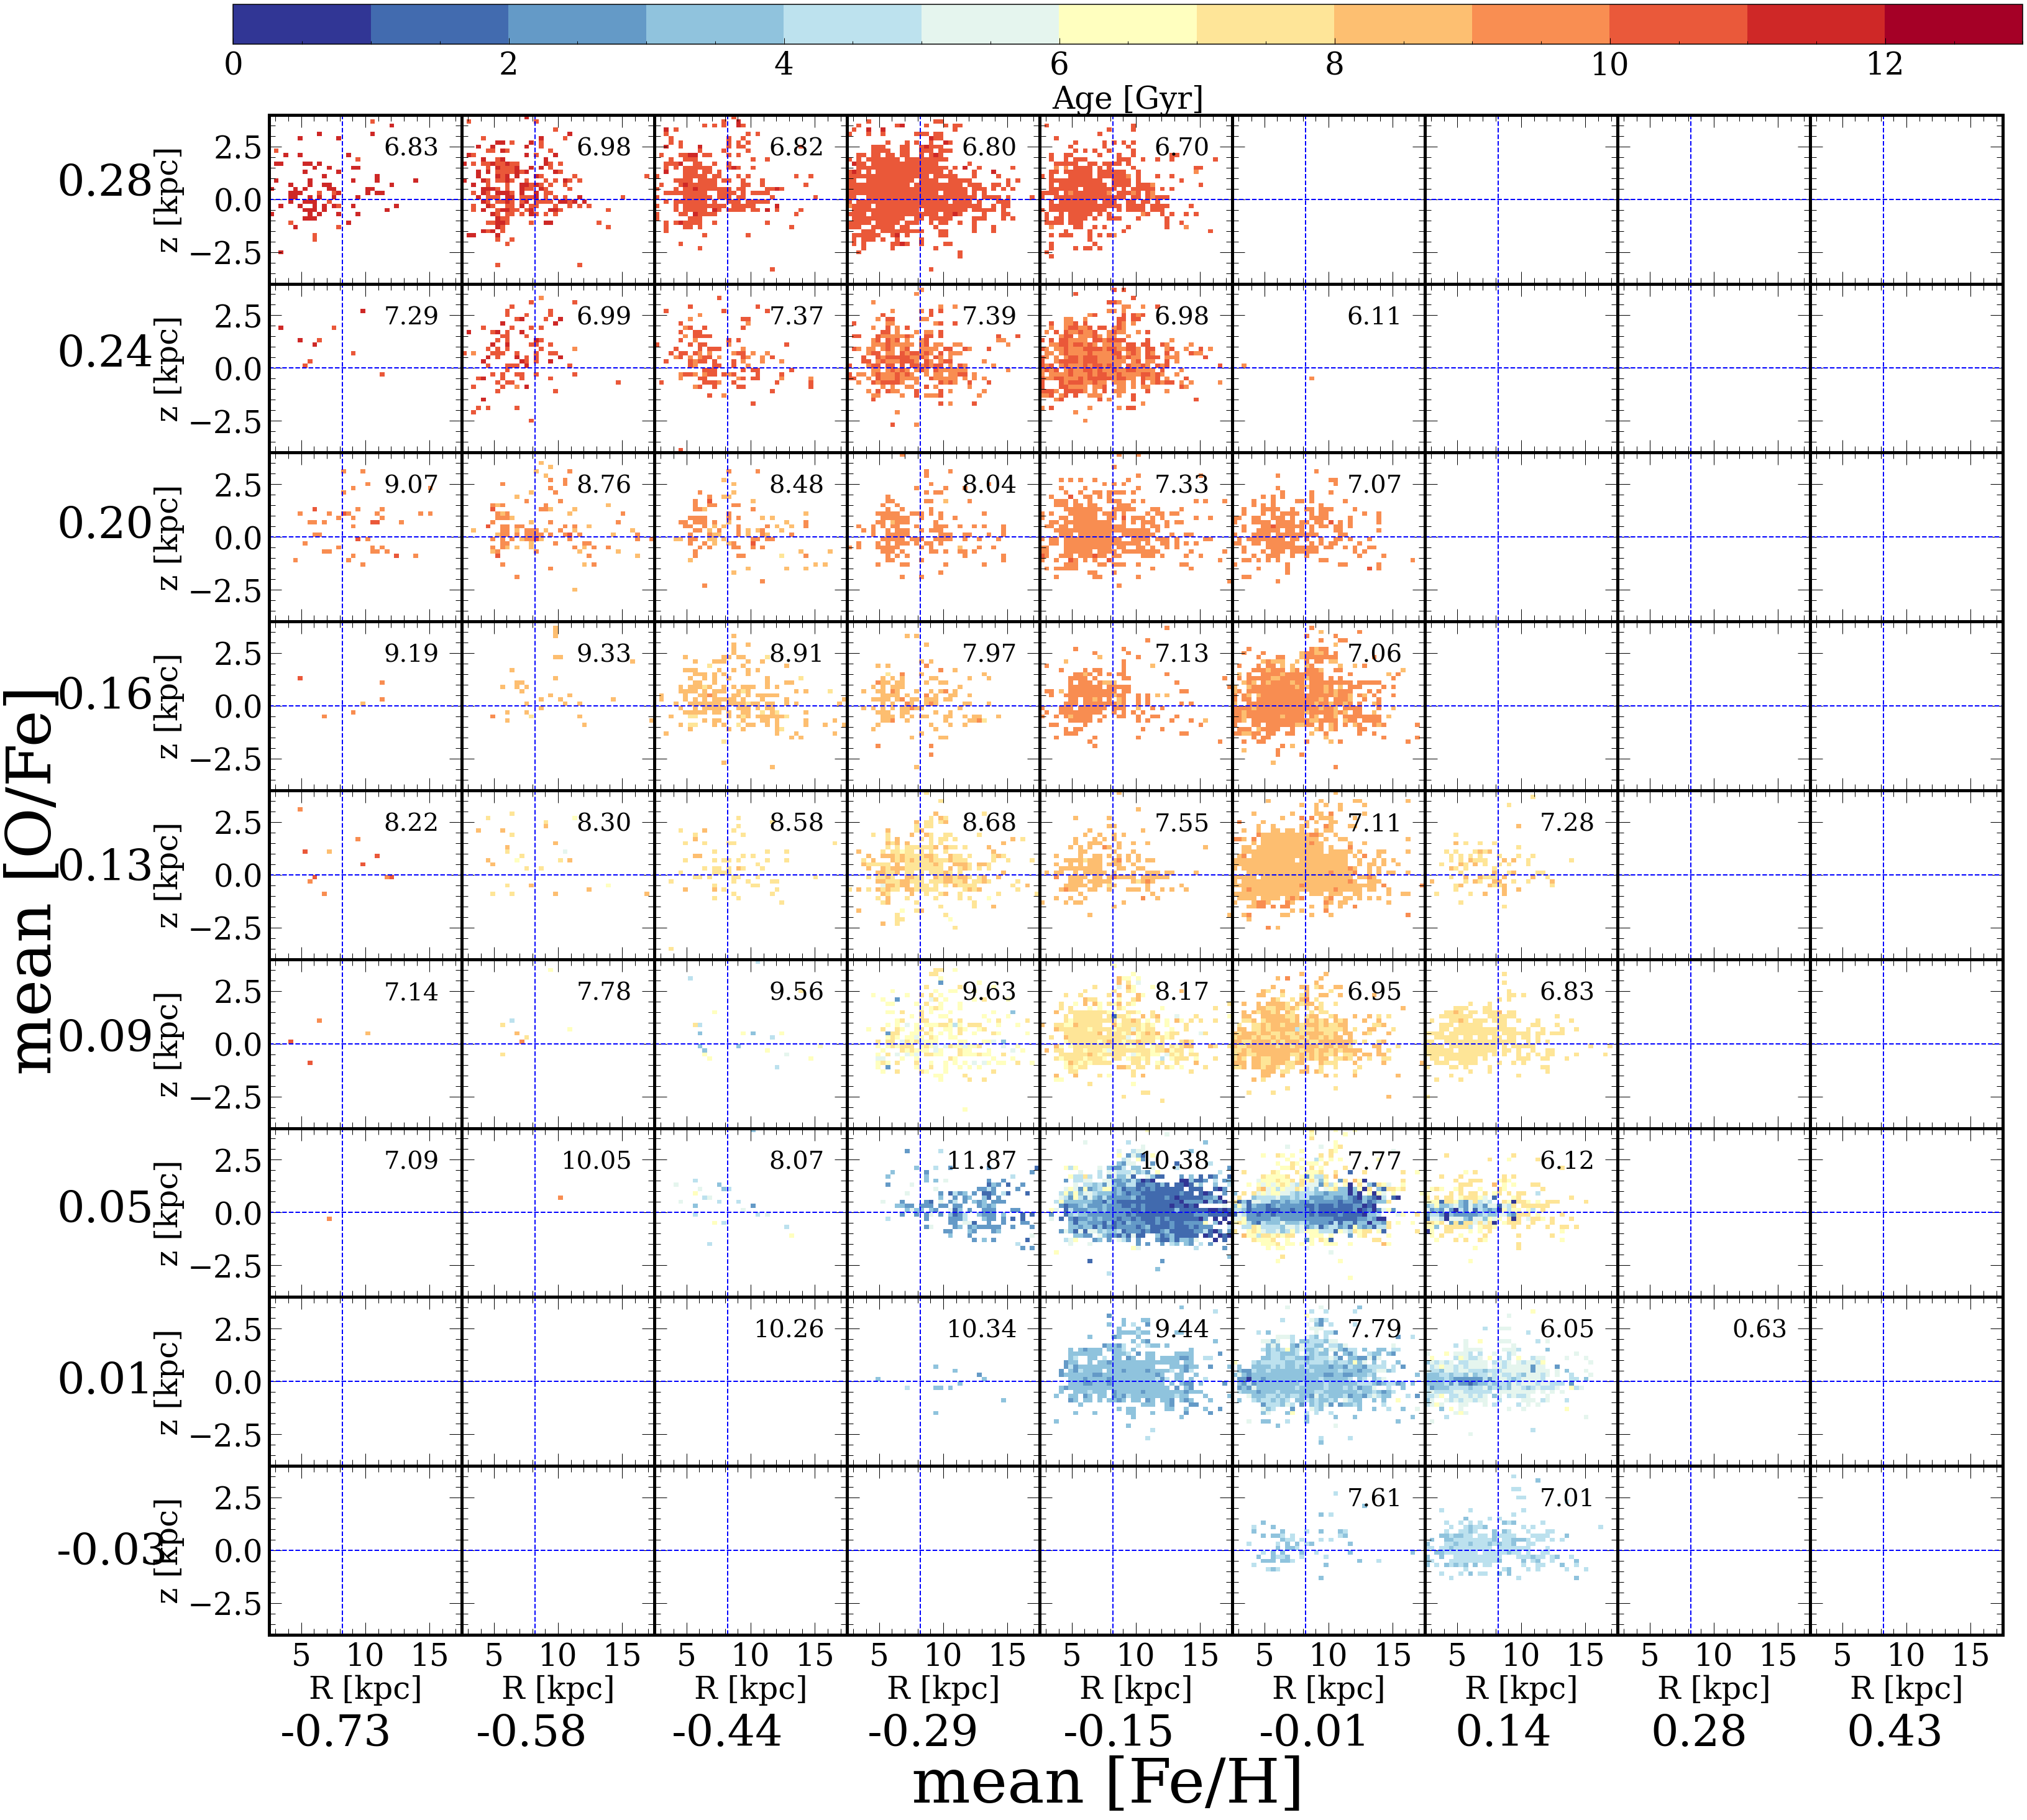

In [10]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40



fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=data.loc[data['ofe_scale']>alpha[i+1]]
    df_all=df_all.loc[df_all['ofe_scale']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_scale'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_scale'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100)
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100)

    
for i in range(0,10-1):
    fig.text(0.03, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)

plt.savefig('monofealpha_sim_'+simNo+'.png')




### Figure 4

In [11]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5

data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

In [12]:
fehISM=pd.DataFrame(pd.read_pickle('../Data/g2.79e12_ISM_metallicity.dat')['feh']).T
ageISM=13.8-pd.DataFrame(pd.read_pickle('../Data/g2.79e12_ISM_metallicity.dat')['time']).T

scale_fe=0.250019907951355/0.35828184923028494
fehISM=fehISM*scale_fe-0.0906638577580452+0.08980628554112494

In [13]:
fehISM['0-2 kpc']=fehISM[0]
fehISM['2-4 kpc']=fehISM[1]
fehISM['4-6 kpc']=fehISM[2]
fehISM['6-8 kpc']=fehISM[3]
fehISM['8-10 kpc']=fehISM[4]
fehISM['10-12 kpc']=fehISM[5]
fehISM['12-14 kpc']=fehISM[6]
fehISM['14-20 kpc']=fehISM[7]

ageISM['0-2 kpc']=ageISM[0]
ageISM['2-4 kpc']=ageISM[1]
ageISM['4-6 kpc']=ageISM[2]
ageISM['6-8 kpc']=ageISM[3]
ageISM['8-10 kpc']=ageISM[4]
ageISM['10-12 kpc']=ageISM[5]
ageISM['12-14 kpc']=ageISM[6]
ageISM['14-20 kpc']=ageISM[7]

In [14]:
ISMdic={0:'0-2 kpc',1:'2-4 kpc',2:'4-6 kpc',3:'6-8 kpc',
       4:'8-10 kpc',5:'10-12 kpc',6:'12-14 kpc',7:'14-20 kpc'}

In [15]:
def getave_age(age,feh,jz=False,jzs=[],fuc=np.median,Nbin=50):
    sgm=np.std(feh)
    meanfeh=np.mean(feh)
    febins=np.linspace(meanfeh-5*sgm,meanfeh+5*sgm,Nbin)
    #print(febins)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    if jz==True:
        meanjz=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)==0:
            continue
        meanfeh[i]=(binlow+binhi)/2
        #print(sum(m))
        if jz==True:
            meanjz[i]=fuc(jzs[m])
        meanage[i]=np.mean(age[m])
        meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
        starnumb[i]=sum(m)
    if jz==True:
        return meanfeh,meanage,meanage_err,meanjz,starnumb
    else:
        return meanfeh,meanage,meanage_err,starnumb

In [16]:
data['dR']=data['R']-data['R_bir']
data['dz']=abs(data['z_today'])-abs(data['z_birth'])

In [17]:
p=fitpoints([-0.8,0.6],[0.25,-0.06])
data['hi_low']=data['ofe_scale']-p(data['feh_scale'])>0

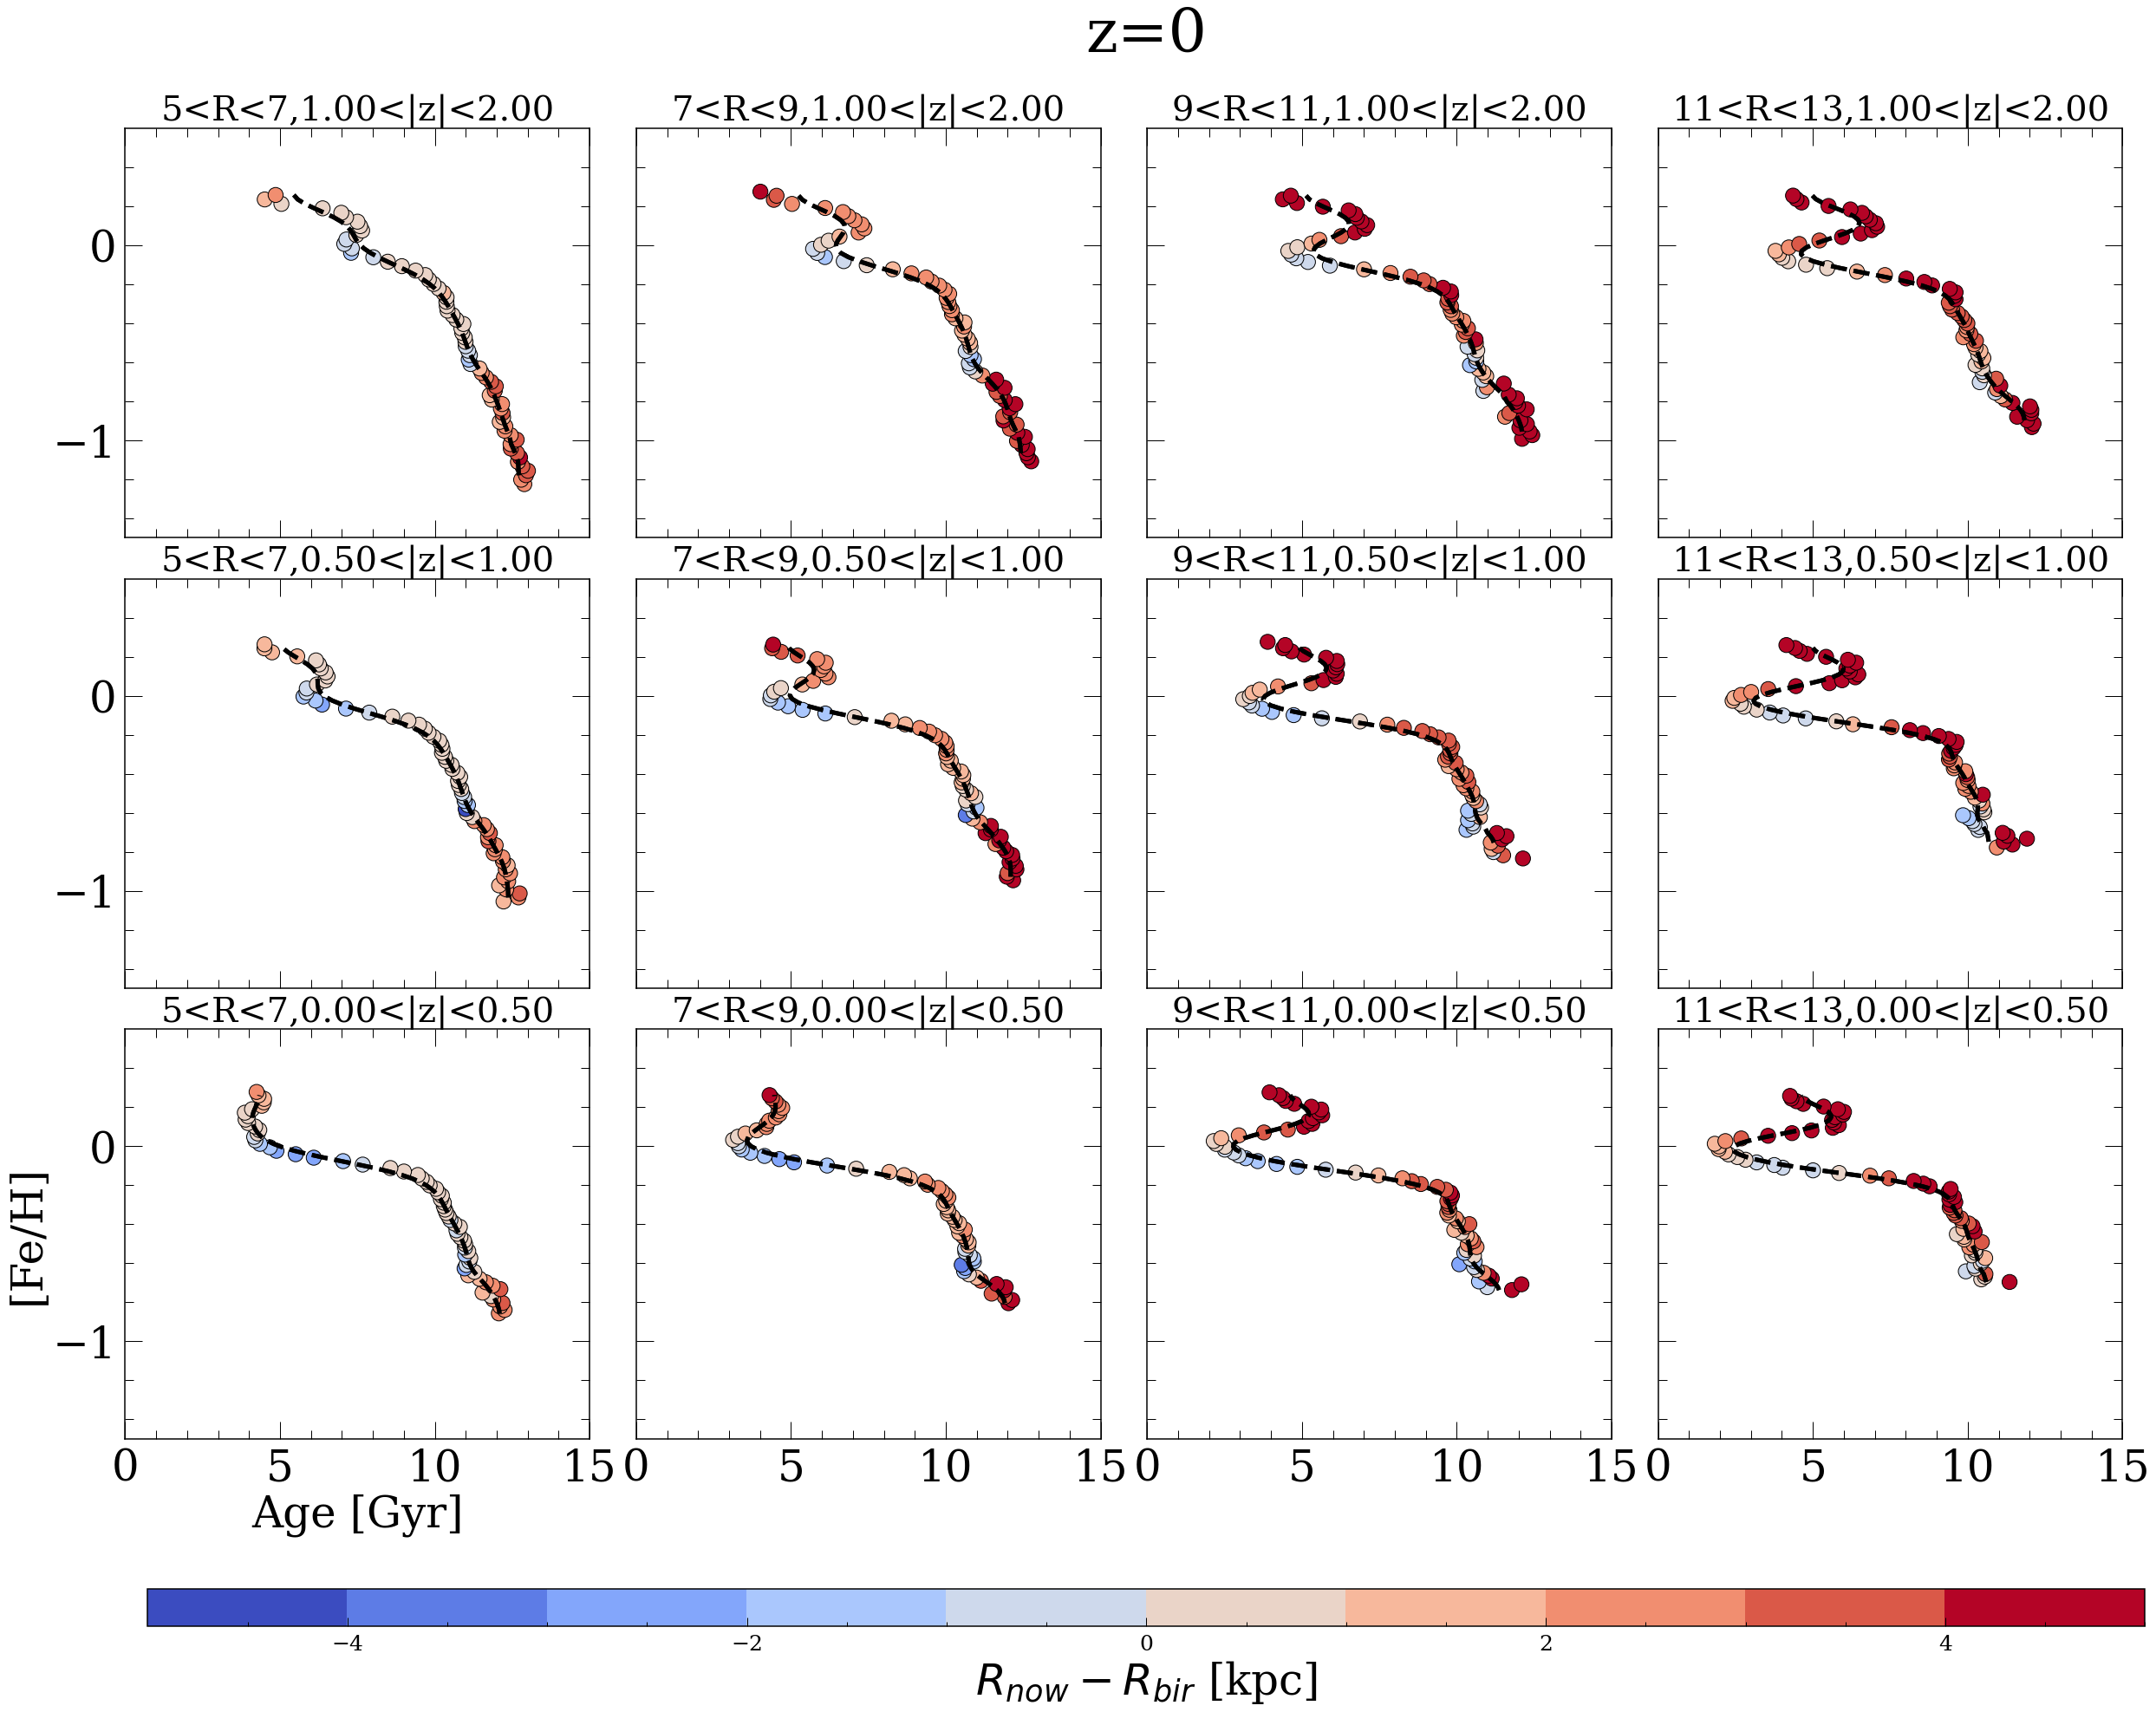

In [18]:
#data=data.loc[data['hi_low']==0]
# plotting as similar to paper
cmap = plt.cm.get_cmap('coolwarm',10)
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]

lims=[-5,5]

fig, axarr = plt.subplots(len(Rbin)-1,len(zbin)-1,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(40,30))

bottom, top = 0.2, 0.9
left, right = 0.1, 0.9

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)


for i in range(len(Rbin)-1):
    df_all=data.loc[data['z_today']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z_today']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
   
        meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                    jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
        
        
        clear_output(wait = True)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]
        
        m2=starnumb>10
        filterage=gaussian_filter(meanage[m2], sigma=3)
        axarr[i,j].plot(filterage,meanfeh[m2],'k--',linewidth=5)
        axarr[i,j].plot(filterage,meanfeh[m2],'k--',linewidth=5)
        #im=axarr[i,j].errorbar(meanage,meanfeh,xerr=meanage_err,fmt='k.')
        im=axarr[i,j].scatter(meanage,meanfeh,c=meanjz,s=300,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
        axarr[i,j].set_xlim([0,15])
        if Rcut:
            axarr[i,j].set_ylim([-1.5,0.6])
        else:
            axarr[i,j].set_ylim([-1.5,0.6])

        axarr[i,j].set_title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=40)
 
        if i!=len(Rbin)-2:
            axarr[i,j].set_xticklabels([])
        if j!=0:
            axarr[i,j].set_yticklabels([])
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)


        
axarr[len(Rbin)-2,0].set_xlabel('Age [Gyr]',fontsize=50)
axarr[len(Rbin)-2,0].set_ylabel('[Fe/H]',fontsize=50)

cb_ax = fig.add_axes([0.109, 0.1, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$R_{now}-R_{bir}$ [kpc]',fontsize = 50,labelpad = 5)

plt.text(0, 420, 'z=0',ha='center', va='center', rotation='horizontal',fontsize=70)

plt.savefig('feage_2_79e12_0.png')


### Figure 7

100%|██████████| 19/19 [00:00<00:00, 78.56it/s]


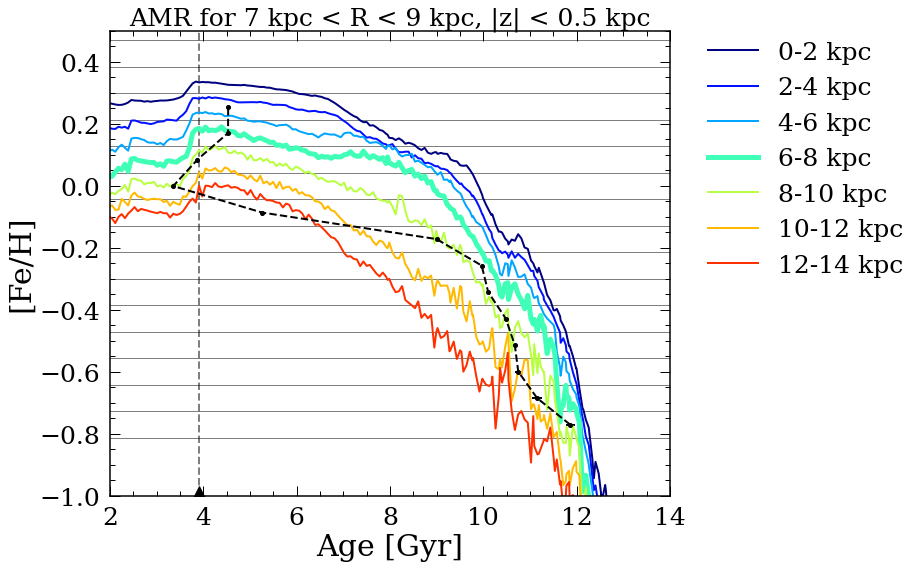

In [19]:
plt.figure(figsize=(13,8))


####################### z=0.34 data #######################
df_all=df_all.loc[df_all['z_today']<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=20)
    

fehbins=[-0.81315266,-0.72761741,-0.64208216,-0.5565469,-0.47101165,-0.38547639,-0.29994114,
         -0.21440589,-0.12887063,-0.04333538,0.04219988,0.12773513,0.21327038,0.29880564,
         0.38434089,0.46987615,0.5554114,0.64094665,0.72648191,0.81201716]
for i in fehbins:
    plt.axhline(i,c='k',alpha=0.5,linewidth=1)

plt.errorbar(meanage[:-6],meanfeh[:-6],xerr=meanage_err[:-6],fmt='ko--',markersize=4)
   
        
plt.xlim([2,14])
plt.ylim([-1,0.5])
plt.plot([13.8-9.9],[-1],'k^',markersize=20)
plt.plot([13.8-9.9,13.8-9.9],[-1,0.5],'k--',alpha=0.5)
 
        
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')

## plot ISM
cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=0, vmax=7)
colors_p=[cmap(norm(i)) for i in range(7)]
for i in range(7):
    if ISMdic[i]=='6-8 kpc':
        plt.plot(ageISM[ISMdic[i]],fehISM[ISMdic[i]],linewidth=5,color=colors_p[i],
             label=ISMdic[i])
    else:
        plt.plot(ageISM[ISMdic[i]],fehISM[ISMdic[i]],linewidth=2,color=colors_p[i],
             label=ISMdic[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('AMR for 7 kpc < R < 9 kpc, |z| < 0.5 kpc',fontsize=25)
plt.tight_layout()

plt.savefig('feage_ISM.png')





### Figure 5

In [20]:
simNo='2_79e12'
z='0_255'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5

data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)
p=fitpoints([-0.8,0.6],[0.25,-0.06])
data['hi_low']=data['ofe_scale']-p(data['feh_scale'])>0
print(len(data))

simNo='2_79e12'
z='0_34'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5
data_034=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)
data_034['hi_low']=data_034['ofe_scale']-p(data_034['feh_scale'])>0
print(len(data_034))


simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5

data_z0=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)
data_z0['hi_low']=data_z0['ofe_scale']-p(data_z0['feh_scale'])>0
print(len(data_z0))

5621225
5210781
7125472


In [44]:
data_034['x_old']=data_034['x_today']
data_034['y_old']=data_034['y_today']
data_034['z_old']=data_034['z_today']

oldstars=data_034
data_old=pd.merge(data,oldstars[['iords','x_old','y_old','z_old']],
                  left_on='iords',right_on='iords',how='inner')
data_old['hi_low']=data_old['ofe_scale']-p(data_old['feh_scale'])>0
data_new=data.loc[~data['iords'].isin(oldstars['iords'])]


data_old_z0=pd.merge(data_z0,oldstars[['iords','x_old','y_old','z_old']],
                  left_on='iords',right_on='iords',how='inner')
data_old_z0['hi_low']=data_old_z0['ofe_scale']-p(data_old_z0['feh_scale'])>0
data_new_z0=data_z0.loc[~data_z0['iords'].isin(data_old_z0['iords'])]

In [46]:
print(len(data_z0),len(data_old_z0),len(data_new_z0),len(data_new_z0)+len(data_old_z0))

7125472 5210781 1914691 7125472


 60%|█████▉    | 59/99 [00:00<00:00, 65.99it/s]<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
  0%|          | 0/19 [00:00<?, ?it/s]<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
  0%|          | 0/99 [00:00<?, ?it/s]<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt

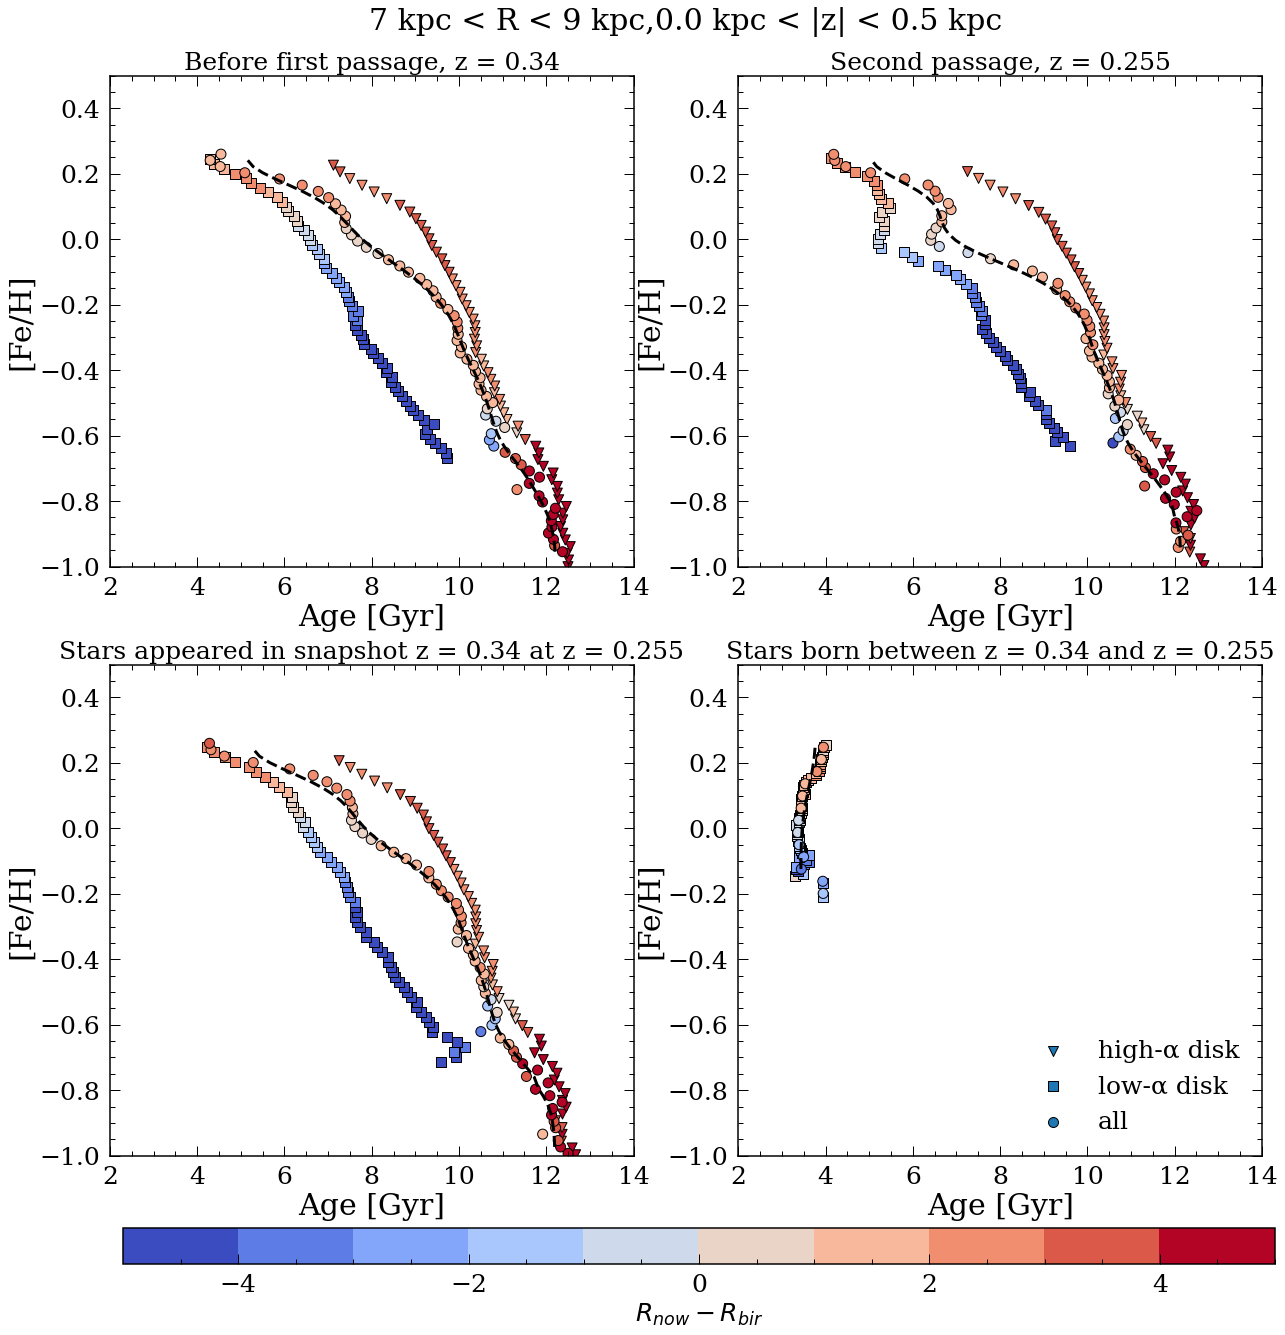

In [23]:
fig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.2, 'wspace': 0.2},
                          figsize=(20,25))
lims=[-5,5]
cmap = plt.cm.get_cmap('coolwarm',10)
####################### z=0.34 data #######################
df_all=data_034.loc[abs(data_034['z_today'])>0]
df_all=df_all.loc[abs(df_all['z_today'])<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        

############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############


m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############


m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[0,0].plot(filterage,meanfeh[m2],'k--',linewidth=3)
       
axarr[0,0].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v')
axarr[0,0].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s')
im=axarr[0,0].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
axarr[0,0].set_xlim([2,14])
axarr[0,0].set_ylim([-1,0.5])

axarr[0,0].set_title('Before first passage, z = 0.34',fontsize=25)
 
        
axarr[0,0].set_xlabel('Age [Gyr]')
axarr[0,0].set_ylabel('[Fe/H]')


####################### z=0.255 data #######################
df_all=data.loc[data['z_today']>0]
df_all=df_all.loc[df_all['z_today']<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[0,1].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[0,1].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v')
axarr[0,1].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s')
im=axarr[0,1].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
axarr[0,1].set_xlim([2,14])
axarr[0,1].set_ylim([-1,0.5])

axarr[0,1].set_title('Second passage, z = 0.255',fontsize=25)
 
        
axarr[0,1].set_xlabel('Age [Gyr]')
axarr[0,1].set_ylabel('[Fe/H]')


####################### z=0.255 data old stars #######################
df_all=data_old.loc[data_old['z_today']>0]
df_all=df_all.loc[df_all['z_today']<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############        

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[1,0].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[1,0].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v')
axarr[1,0].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s')
im=axarr[1,0].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
axarr[1,0].set_xlim([2,14])
axarr[1,0].set_ylim([-1,0.5])

axarr[1,0].set_title('Stars appeared in snapshot z = 0.34 at z = 0.255',fontsize=25)
 
        
axarr[1,0].set_xlabel('Age [Gyr]')
axarr[1,0].set_ylabel('[Fe/H]')

####################### z=0.255 data new stars #######################
df_all=data_new.loc[data_new['z_today']>0]
df_all=df_all.loc[df_all['z_today']<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=20)
        
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############       

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]
############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[1,1].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[1,1].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v',label='high-α disk')
axarr[1,1].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s',label='low-α disk')
im=plt.scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,label='all')
        
        
axarr[1,1].set_xlim([2,14])
axarr[1,1].set_ylim([-1,0.5])

axarr[1,1].set_title('Stars born between z = 0.34 and z = 0.255',fontsize=25)
 
        
axarr[1,1].set_xlabel('Age [Gyr]')
axarr[1,1].set_ylabel('[Fe/H]')
axarr[1,1].legend(loc=4)
##### add color bar ####
bottom, top = 0.2, 0.8
left, right = 0.1, 0.9
fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)
cb_ax = fig.add_axes([0.109, 0.14, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$R_{now}-R_{bir}$',fontsize = 25,labelpad = 5)

fig.text(0.5, 0.83, '7 kpc < R < 9 kpc,0.0 kpc < |z| < 0.5 kpc',ha='center', 
         va='center', rotation='horizontal',fontsize=30)

plt.savefig('feage_merger.png')




 61%|██████    | 60/99 [00:00<00:00, 93.45it/s] <ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
 56%|█████▌    | 55/99 [00:00<00:00, 101.00it/s]<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
  6%|▌         | 6/99 [00:00<00:01, 55.47it/s]

95435


 55%|█████▍    | 54/99 [00:00<00:00, 100.67it/s]<ipython-input-15-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
100%|██████████| 99/99 [00:00<00:00, 126.51it/s]
<ipython-input-48-8a677d849f49>:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


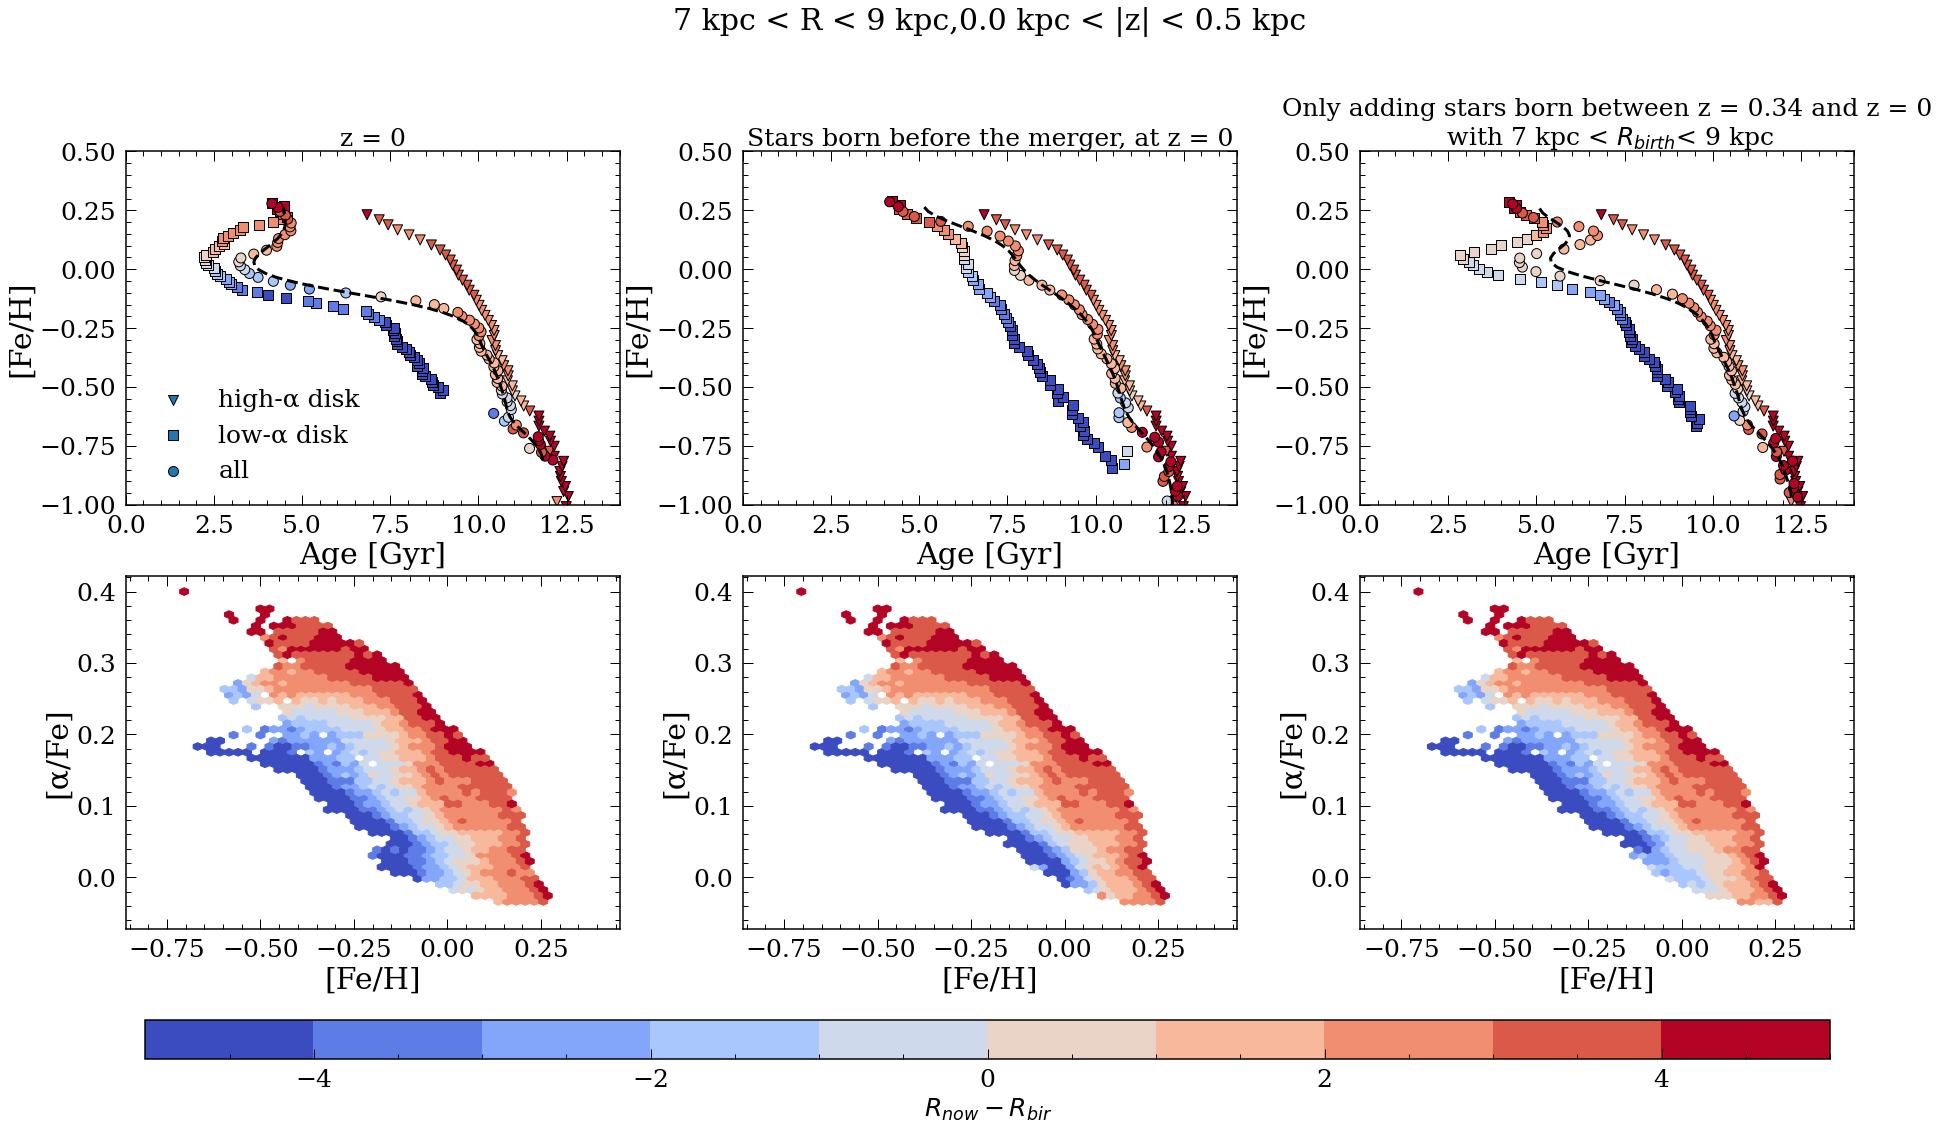

In [48]:
fig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.25},
                          figsize=(30,18))


####################### z=0.255 data #######################
df_all=data_old_z0.loc[abs(data_old_z0['z_today'])>0]
df_all=df_all.loc[abs(df_all['z_today'])<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############        

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[0,1].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[0,1].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v')
axarr[0,1].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s')
im=axarr[0,1].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
axarr[0,1].set_xlim([0,14])
axarr[0,1].set_ylim([-1,0.5])

axarr[0,1].set_title('Stars born before the merger, at z = 0',fontsize=25)
 
        
axarr[0,1].set_xlabel('Age [Gyr]')
axarr[0,1].set_ylabel('[Fe/H]')

# plot fe-alpha
axarr[1,1].hexbin(df_all_z['feh_scale'],df_all_z['ofe_scale'],C=df_all_z['dR'],vmin=lims[0],vmax=lims[1],
                 extent=(-0.8,0.4,-0.05,0.4),mincnt=10,gridsize=50,cmap=cmap)
axarr[1,1].set_xlabel('[Fe/H]')
axarr[1,1].set_ylabel('[α/Fe]')


################### z=0 all stars #########################
df_all=data_z0.loc[abs(data_z0['z_today'])>0]
df_all=df_all.loc[abs(df_all['z_today'])<0.5]
        
df_all_z=df_all.loc[df_all['R']>7]
df_all_z=df_all_z.loc[df_all_z['R']<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])


meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############        

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[0,0].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[0,0].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v',label='high-α disk')
axarr[0,0].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s',label='low-α disk')
im=axarr[0,0].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,label='all')
        
        
axarr[0,0].set_xlim([0,14])
axarr[0,0].set_ylim([-1,0.5])

axarr[0,0].set_title('z = 0',fontsize=25)
axarr[0,0].legend(loc=3)
        
axarr[0,0].set_xlabel('Age [Gyr]')
axarr[0,0].set_ylabel('[Fe/H]')


# plot fe-alpha
axarr[1,0].hexbin(df_all_z['feh_scale'],df_all_z['ofe_scale'],C=df_all_z['dR'],vmin=lims[0],vmax=lims[1],
                 extent=(-0.8,0.4,-0.05,0.4),mincnt=10,gridsize=50,cmap=cmap)
axarr[1,0].set_xlabel('[Fe/H]')
axarr[1,0].set_ylabel('[α/Fe]')

################### z=0 all new stars #########################
df_all_new_rbithsame=data_new_z0.loc[abs(data_new_z0['z_today'])>0]
df_all_new_rbithsame=df_all_new_rbithsame.loc[abs(df_all_new_rbithsame['z_today'])<0.5]
df_all_new_rbithsame=df_all_new_rbithsame.loc[df_all_new_rbithsame['R_bir']>7]
df_all_new_rbithsame=df_all_new_rbithsame.loc[df_all_new_rbithsame['R_bir']<9]

df_all_old=data_old_z0.loc[abs(data_old_z0['z_today'])>0]
df_all_old=df_all_old.loc[abs(df_all_old['z_today'])<0.5]
        
df_all_old=df_all_old.loc[df_all_old['R']>7]
df_all_old=df_all_old.loc[df_all_old['R']<9]

df_all=pd.concat([df_all_old,df_all_new_rbithsame])
df_all=df_all.drop_duplicates(subset=['iords'],keep='first')

df_all_z=df_all.loc[df_all['R']>7]
df_all_z=df_all_z.loc[df_all_z['R']<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
print(len(df_all_z))
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
        
############### high and low ############
df_all_z_ha=df_all_z.loc[df_all_z['hi_low']==1].reset_index(drop=True)
df_all_z_la=df_all_z.loc[df_all_z['hi_low']==0].reset_index(drop=True)
meanfeh_ha,meanage_ha,meanage_err_ha,meanjz_ha,starnumb_ha=getave_age(df_all_z_ha['age'],df_all_z_ha['feh_scale'],
                                                       jz=True,jzs=(df_all_z_ha['dR']),fuc=np.median,Nbin=100)
   
meanfeh_la,meanage_la,meanage_err_la,meanjz_la,starnumb_la=getave_age(df_all_z_la['age'],df_all_z_la['feh_scale'],
                                                       jz=True,jzs=(df_all_z_la['dR']),fuc=np.median,Nbin=100)
   
############### high and low ############        

m=(meanfeh!=0)
meanfeh,meanage,meanage_err,starnumb,meanjz=meanfeh[m],meanage[m],meanage_err[m],starnumb[m],meanjz[m]

############### high and low ############
m=(meanfeh_ha!=0)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha,meanjz_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m],meanjz_ha[m]

m=(meanfeh_la!=0)
meanfeh_la,meanage_la,meanage_err_la,starnumb_la,meanjz_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m],meanjz_la[m]
############### high and low ############

m2=starnumb>10
filterage=gaussian_filter(meanage[m2], sigma=3)

axarr[0,2].plot(filterage,meanfeh[m2],'k--',linewidth=3)

axarr[0,2].scatter(meanage_ha,meanfeh_ha,c=meanjz_ha,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='v')
axarr[0,2].scatter(meanage_la,meanfeh_la,c=meanjz_la,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap,marker='s')
im=axarr[0,2].scatter(meanage,meanfeh,c=meanjz,s=100,vmin=lims[0],vmax=lims[1],edgecolor='k',cmap=cmap)
        
        
axarr[0,2].set_xlim([0,14])
axarr[0,2].set_ylim([-1,0.5])

axarr[0,2].set_title('Only adding stars born between z = 0.34 and z = 0\n with 7 kpc < $R_{birth}$< 9 kpc',fontsize=25)
 
        
axarr[0,2].set_xlabel('Age [Gyr]')
axarr[0,2].set_ylabel('[Fe/H]')


# plot fe-alpha
axarr[1,2].hexbin(df_all_z['feh_scale'],df_all_z['ofe_scale'],
                  C=df_all_z['dR'],vmin=lims[0],vmax=lims[1],
                 extent=(-0.8,0.4,-0.05,0.4),mincnt=10,gridsize=50,cmap=cmap)
axarr[1,2].set_xlabel('[Fe/H]')
axarr[1,2].set_ylabel('[α/Fe]')



##### add color bar ####
bottom, top = 0.2, 0.8
left, right = 0.1, 0.9
fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.25)
cb_ax = fig.add_axes([0.109, 0.1, 0.78, 0.03])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$R_{now}-R_{bir}$',fontsize = 25,labelpad = 5)

fig.text(0.5, 0.9, '7 kpc < R < 9 kpc,0.0 kpc < |z| < 0.5 kpc',ha='center', 
         va='center', rotation='horizontal',fontsize=30)


plt.tight_layout()
plt.savefig('feage_merger_z0.png')

### Figure 6

In [59]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=50
zcut_thread=5

data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

7531171


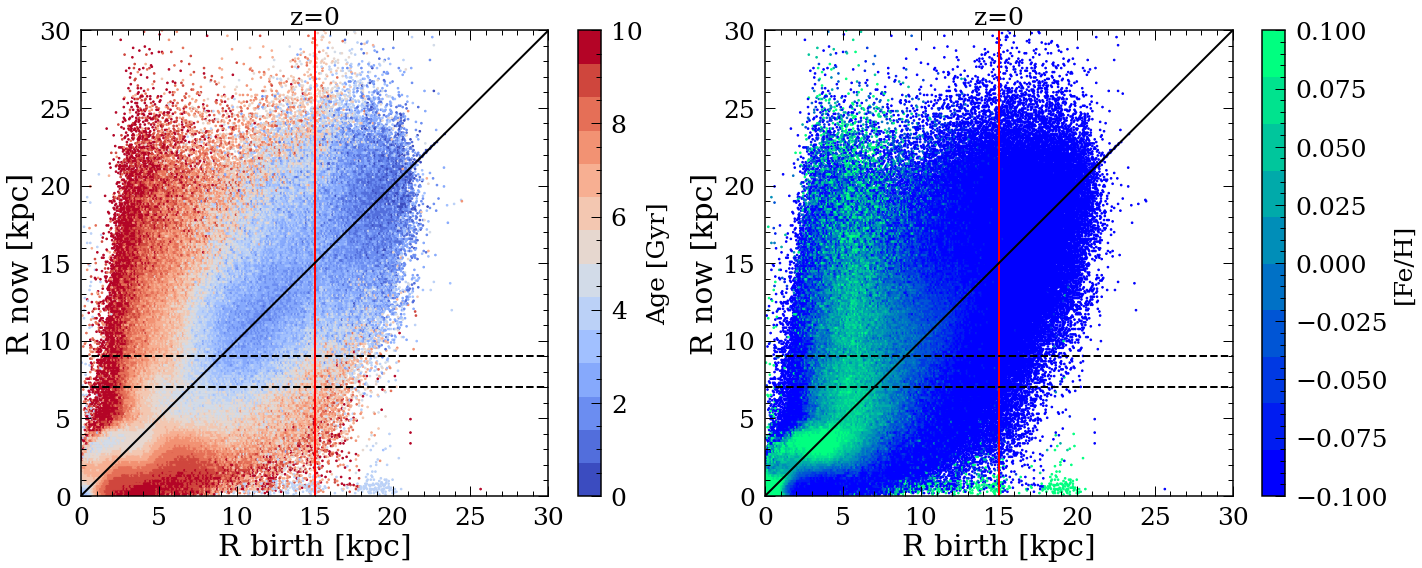

In [60]:
print(len(data))
data_zcut=data.loc[abs(data['z_today'])<0.5].reset_index()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
cm = plt.cm.get_cmap('coolwarm',14)
x1,x2,y1,y2=0,30,0,30

plt.hexbin(data_zcut['R_bir'].values, data_zcut['R'].values,
                    C=data_zcut['age'].values, cmap=cm,vmin=0,vmax=10, 
                    gridsize=300,extent=(x1,x2,y1,y2),
                    reduce_C_function = np.mean, mincnt=1)

plt.plot([x1,x2],[7,7],'k--')
plt.plot([x1,x2],[9,9],'k--')
plt.plot([15,15],[0,30],'r-')                         
plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.plot([x1,x2],[x1,x2],'k-')
plt.xlabel('R birth [kpc]')
plt.ylabel('R now [kpc]')

cbar = plt.colorbar()
car = cbar.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)
plt.title('z=0',fontsize=25)

plt.subplot(1,2,2)
cm = plt.cm.get_cmap('winter',10)

plt.hexbin(data_zcut['R_bir'].values, data_zcut['R'].values,
                    C=data_zcut['feh_scale'].values, cmap=cm,vmin=-0.1,vmax=0.1, 
                    gridsize=300,extent=(x1,x2,y1,y2),
                    reduce_C_function = np.mean, mincnt=1)
plt.plot([15,15],[0,30],'r-')                       
plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.plot([x1,x2],[x1,x2],'k-')
plt.plot([x1,x2],[7,7],'k--')
plt.plot([x1,x2],[9,9],'k--')
plt.xlabel('R birth [kpc]')
plt.ylabel('R now [kpc]')
plt.title('z=0',fontsize=25)

cbar = plt.colorbar()
car = cbar.set_label('[Fe/H]',fontsize = 25,labelpad = 5)


"""
data_zcut=data_034.loc[abs(data_034['z_today'])<0.5].reset_index()
plt.subplot(1,3,3)
cm = plt.cm.get_cmap('winter',14)

plt.hexbin(data_zcut['R_bir'].values, data_zcut['R'].values,
                    C=data_zcut['feh_scale'].values, cmap=cm,vmin=-0.1,vmax=0.1, 
                    gridsize=300,extent=(x1,x2,y1,y2),
                    reduce_C_function = np.mean, mincnt=1)
                       
plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.plot([x1,x2],[x1,x2],'k-')
plt.plot([x1,x2],[7,7],'k--')
plt.plot([x1,x2],[9,9],'k--')
plt.xlabel('R birth')
plt.ylabel('R now')
plt.title('z=0.34',fontsize=25)

cbar = plt.colorbar()
car = cbar.set_label('[Fe/H]',fontsize = 25,labelpad = 5)

plt.tight_layout()


plt.text(-25, 33, 'R birth vs R now after cutting Rbirth |z|<0.5 kpc', 
             ha='center', va='center', rotation='horizontal',fontsize=35)
"""

plt.tight_layout()
"""
plt.text(-5, 33, 'R birth vs R now after cutting Rbirth |z|<0.5 kpc', 
             ha='center', va='center', rotation='horizontal',fontsize=35)
"""

plt.savefig('RbirthRnow_Rbirthcut_'+simNo+'_z_'+z+'.png')

## Figure 8

In [61]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5

sim=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

data=pd.read_pickle('../../SecondYear/CannonDR16_cut.pkl')

data=data[data['M_H_ERR']>0].reset_index(drop=True)
pmh=fitpoints(data['M_H'],data['M_H_ERR'])
print(np.median(data['M_H_ERR']))

page=fitpoints(data['Age'],data['Age_err'])
print(np.median(data['Age_err']))

0.007523486
2.965083063204893


In [62]:
"""
plt.figure()
plt.plot(data['M_H'],data['M_H_ERR'],'.')

plt.figure()
plt.plot(data['Age'],data['Age_err'],'.')
plt.plot(data['Age'],page(data['Age']),'.')
plt.figure()
plt.plot(df_all_z['feh_scale'],pmh(df_all_z['feh_scale']),'.')
"""

"\nplt.figure()\nplt.plot(data['M_H'],data['M_H_ERR'],'.')\n\nplt.figure()\nplt.plot(data['Age'],data['Age_err'],'.')\nplt.plot(data['Age'],page(data['Age']),'.')\nplt.figure()\nplt.plot(df_all_z['feh_scale'],pmh(df_all_z['feh_scale']),'.')\n"

 77%|███████▋  | 76/99 [00:02<00:00, 34.16it/s]<ipython-input-20-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
<ipython-input-20-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
 82%|████████▏ | 81/99 [00:02<00:00, 36.28it/s]<ipython-input-20-c76ac8026632>:27: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
100%|██████████| 99/99 [00:02<00:00, 38.57it/s]
<ipython-input-54-55ca02419b18>:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


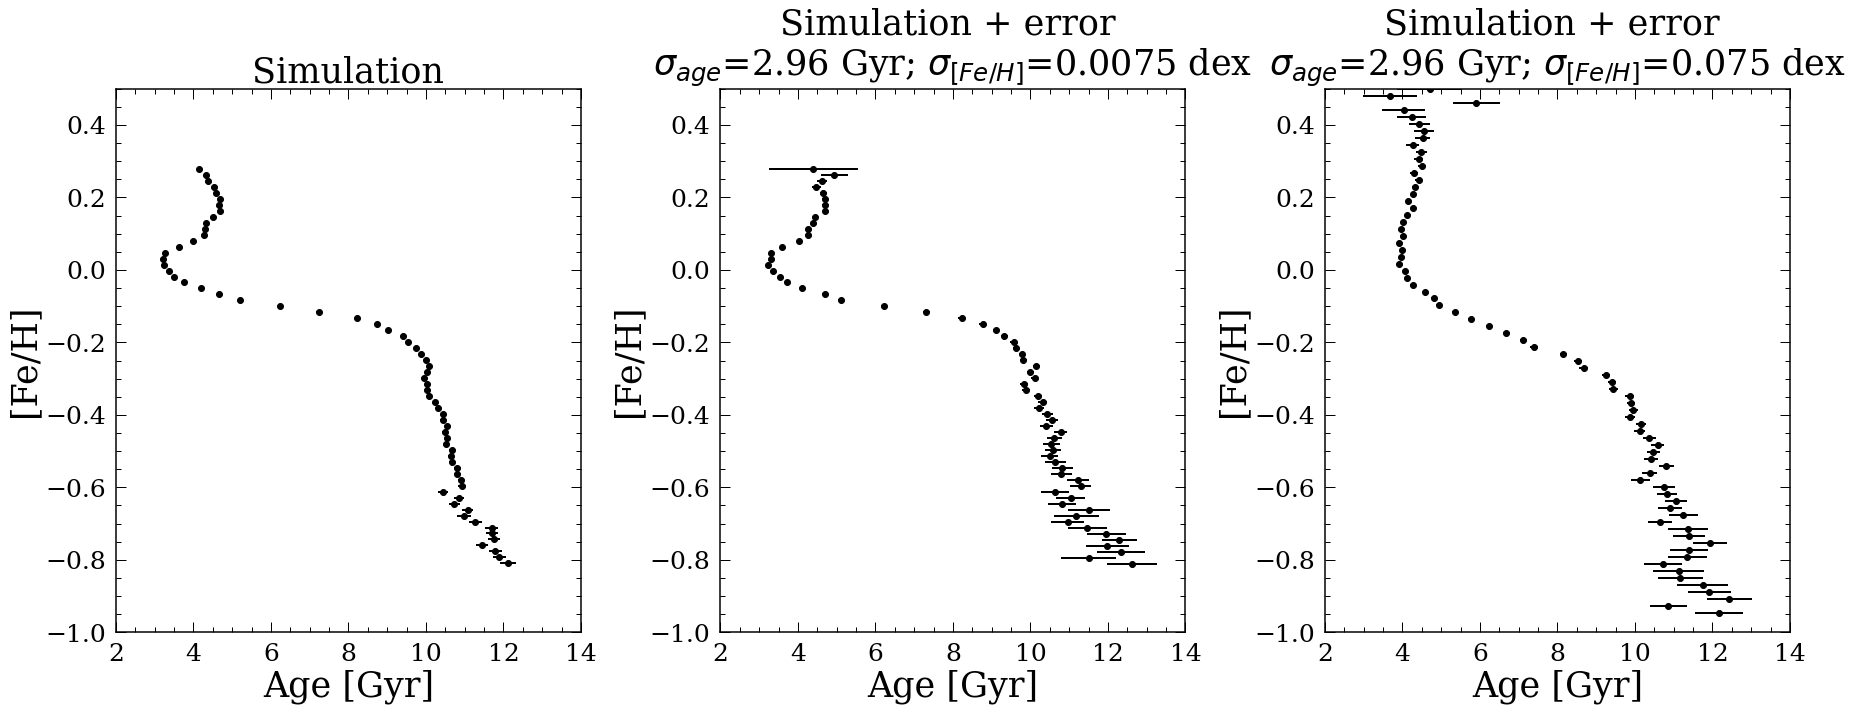

In [54]:
ftz=35
fig, axarr = plt.subplots(1,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.3},
                          figsize=(30,10))


####################### z=0.34 data #######################
df_all=sim.loc[abs(sim['z_today'])<0.5]
        
df_all_z=df_all.loc[abs(df_all['R'])>7]
df_all_z=df_all_z.loc[abs(df_all_z['R'])<9]
        
df_all_z=df_all_z.dropna(subset=['feh_scale','age'])
        
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['age'],df_all_z['feh_scale'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)
    


im=axarr[0].errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko')
        
        
axarr[0].set_xlim([2,14])
axarr[0].set_ylim([-1,0.5])

axarr[0].set_title('Simulation',fontsize=ftz)
 
        
axarr[0].set_xlabel('Age [Gyr]',fontsize=ftz)
axarr[0].set_ylabel('[Fe/H]',fontsize=ftz)


###################### create data with error ######################
oldage=df_all_z['age'].values
oldfeh=df_all_z['feh_scale'].values
df_all_z['newage']=[np.random.normal(i,2.96) for i in oldage]
df_all_z['newfeh']=[np.random.normal(i,0.0075) for i in oldfeh]
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['newage'],df_all_z['newfeh'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)


im=axarr[1].errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko')
        
        
axarr[1].set_xlim([2,14])
axarr[1].set_ylim([-1,0.5])

axarr[1].set_title('Simulation + error \n$σ_{age}$=2.96 Gyr; $σ_{[Fe/H]}$=0.0075 dex',fontsize=ftz)
 
        
axarr[1].set_xlabel('Age [Gyr]',fontsize=ftz)
axarr[1].set_ylabel('[Fe/H]',fontsize=ftz)

##################### larger error ######################
oldage=df_all_z['age'].values
oldfeh=df_all_z['feh_scale'].values
df_all_z['newage']=[np.random.normal(i,2.96) for i in oldage]
df_all_z['newfeh']=[np.random.normal(i,0.1) for i in oldfeh]
meanfeh,meanage,meanage_err,meanjz,starnumb=getave_age(df_all_z['newage'],df_all_z['newfeh'],
                                                       jz=True,jzs=(df_all_z['dR']),fuc=np.median,Nbin=100)


im=axarr[2].errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko')
        
        
axarr[2].set_xlim([2,14])
axarr[2].set_ylim([-1,0.5])

axarr[2].set_title('Simulation + error \n$σ_{age}$=2.96 Gyr; $σ_{[Fe/H]}$=0.075 dex',fontsize=ftz)
 
        
axarr[2].set_xlabel('Age [Gyr]',fontsize=ftz)
axarr[2].set_ylabel('[Fe/H]',fontsize=ftz)


plt.tight_layout()

plt.savefig('feage_error.png')





### Figure 9

In [26]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=5

data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)


In [80]:
def getave_migration(age, R_bir, R_now, Nbin=50, plothist=True):
    agebins=np.linspace(0, 14, Nbin)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    strength=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    
    if plothist:
        plt.figure(figsize=(10,8))
    for i in trange(Nbin-1):
        binlow=agebins[i]
        binhi=agebins[i+1]

        m=(age>=binlow)&(age<=binhi)
        
        if sum(m)==0:
            continue
            
        meanage[i]=(binlow+binhi)/2
        meanR_bir=np.mean(R_bir[m])
        strength[i]=np.std((R_bir[m]-R_now[m]))
        meanage_err[i]=(np.std(R_bir[m]-R_now[m]))/np.sqrt(sum(m)-1)
        starnumb[i]=sum(m)
        
        if plothist:
            plt.hist(R_bir[m]-R_now[m],bins=np.linspace(-8,4,100),alpha=0.5,density=True)
    
    return meanage,strength,meanage_err,starnumb
    

In [93]:
data=data.loc[abs(data['R']-8)<1].reset_index(drop=True)
ofe_things=np.linspace(-0.1,0.4,10)
cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=min(ofe_things), vmax=max(ofe_things))

colors_p=[cmap(norm(i)) for i in ofe_things]



meanage,meandR,meanage_err,starnumb=getave_migration(data['age'],data['R_bir'],data['R'],Nbin=300,plothist=False)



 97%|█████████▋| 289/299 [00:22<00:00, 15.10it/s]<ipython-input-80-a1bda41f8d89>:23: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(R_bir[m]-R_now[m]))/np.sqrt(sum(m)-1)
100%|██████████| 299/299 [00:22<00:00, 13.20it/s]


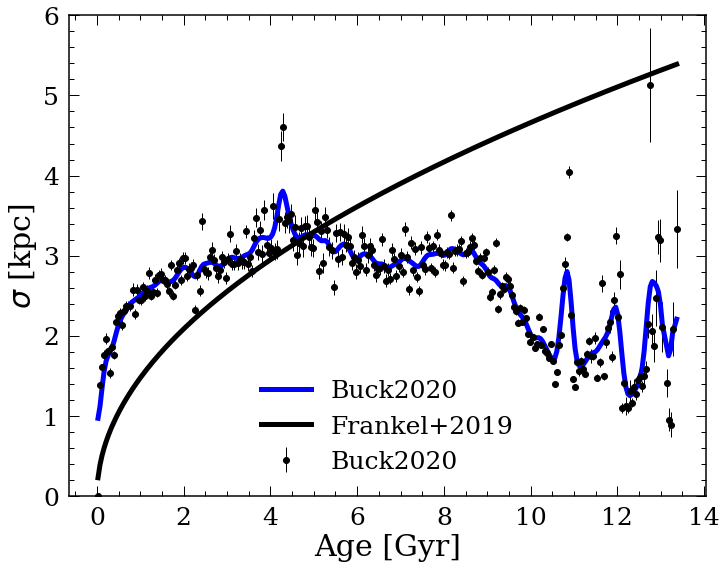

In [95]:
m=starnumb>30
meanage,meandR,meanage_err,starnumb=meanage[m],meandR[m],meanage_err[m],starnumb[m]

plt.figure(figsize=(10,8))
plt.errorbar(meanage,meandR,yerr=meanage_err,fmt='ko',label='Buck2020',linewidth=1)

smoothstrength=gaussian_filter(meandR, sigma=2)
plt.plot(meanage,smoothstrength,'b-',label='Buck2020',linewidth=5)

plt.plot(meanage,3.9*np.sqrt(meanage/7),'k-',linewidth=5,
                 label='Frankel+2019')

plt.xlabel('Age [Gyr]')
plt.ylabel('$σ$ [kpc]')
plt.legend()
plt.ylim([0,6])
plt.tight_layout()
plt.savefig('migration_strength.png')

In [ ]:
smoothstrength=gaussian_filter(meandR, sigma=10)
plt.plot(meanage,smoothstrength,fmt='b--',label='all')

# metallicity gradient

In [27]:
def getave_age(age,feh,jz=False,jzs=[],fuc=np.median,Nbin=50):
    sgm=np.std(feh)
    meanfeh=np.mean(feh)
    febins=np.linspace(meanfeh-5*sgm,meanfeh+5*sgm,Nbin)
    #print(febins)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    if jz==True:
        meanjz=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)==0:
            continue
        meanfeh[i]=(binlow+binhi)/2
        #print(sum(m))
        if jz==True:
            meanjz[i]=fuc(jzs[m])
        meanage[i]=np.mean(age[m])
        meanage_err[i]=(np.std(age[m]))
        starnumb[i]=sum(m)
    if jz==True:
        return meanfeh,meanage,meanage_err,meanjz,starnumb
    else:
        return meanfeh,meanage,meanage_err,starnumb

100%|██████████| 99/99 [00:00<00:00, 358.78it/s]


Text(0.5, 0, 'Age [Gyr]')

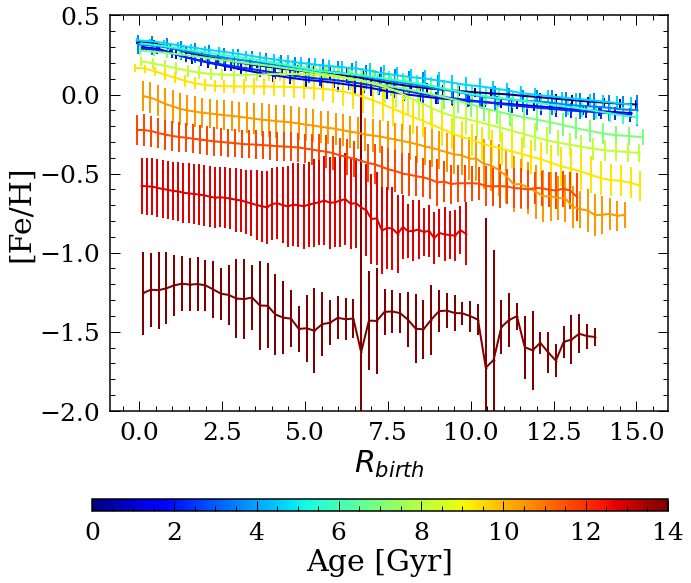

In [28]:
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

minage,maxage=0,14
binbumb=14
agebins=np.linspace(minage,maxage,binbumb)
colors=getcolor(agebins[:-1])
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
for i in range(len(agebins)-1):
    selectstars=data_z0.loc[(data_z0['age']>agebins[i])&(data_z0['age']<agebins[i+1])]
    meanfeh,meanage,meanage_err,starnumb=getave_age(selectstars['feh_scale'],selectstars['R_bir'],
                                                       jz=False,Nbin=100)
    m=meanage!= 0
    im=plt.errorbar(meanfeh[m],meanage[m],yerr=meanage_err[m],fmt='o-',markersize=1,
             c=colors[i])
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.ylim([-2,0.5])



plt.subplot(2,1,2)
a = np.array([[minage,maxage]])
img = plt.imshow(a, cmap="jet")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.45, 0.8, 0.01])
plt.colorbar(orientation="horizontal", cax=cax)
plt.xlabel('Age [Gyr]')

100%|██████████| 99/99 [00:00<00:00, 361.15it/s]


Text(0.5, 0, 'Age [Gyr]')

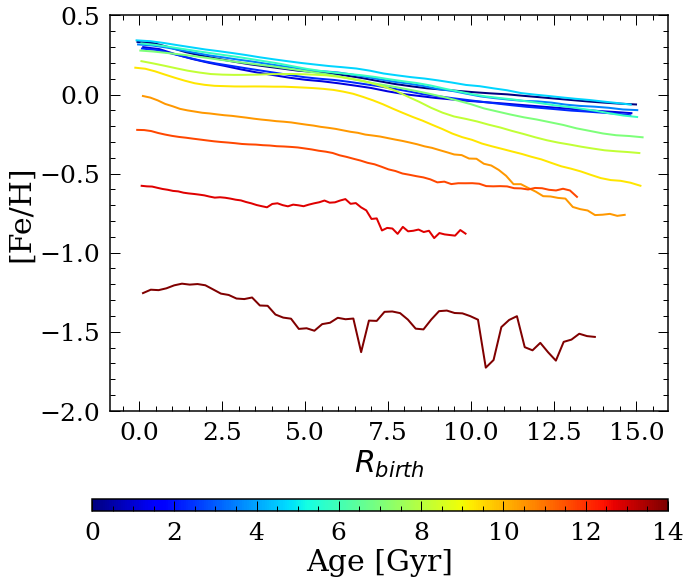

In [31]:
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

minage,maxage=0,14
binbumb=14
agebins=np.linspace(minage,maxage,binbumb)
colors=getcolor(agebins[:-1])
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
for i in range(len(agebins)-1):
    selectstars=data_z0.loc[(data_z0['age']>agebins[i])&(data_z0['age']<agebins[i+1])]
    meanfeh,meanage,meanage_err,starnumb=getave_age(selectstars['feh_scale'],selectstars['R_bir'],
                                                       jz=False,Nbin=100)
    m=meanage!= 0
    im=plt.plot(meanfeh[m],meanage[m],c=colors[i])
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.ylim([-2,0.5])



plt.subplot(2,1,2)
a = np.array([[minage,maxage]])
img = plt.imshow(a, cmap="jet")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.45, 0.8, 0.01])
plt.colorbar(orientation="horizontal", cax=cax)
plt.xlabel('Age [Gyr]')

100%|██████████| 99/99 [00:01<00:00, 61.76it/s]


Text(0.5, 0, 'Age [Gyr]')

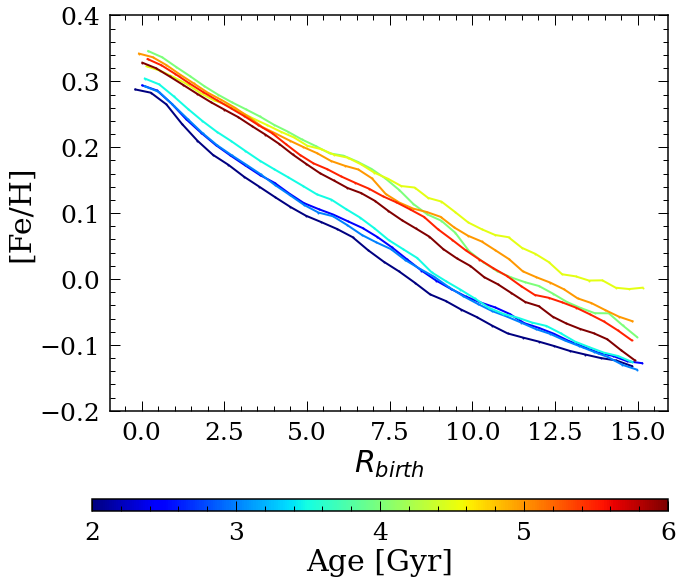

In [33]:
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

minage,maxage=2,6
binbumb=10
agebins=np.linspace(minage,maxage,binbumb)
colors=getcolor(agebins[:-1])
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
for i in range(len(agebins)-1):
    selectstars=data_z0.loc[(data_z0['age']>agebins[i])&(data_z0['age']<agebins[i+1])]
    meanfeh,meanage,meanage_err,starnumb=getave_age(selectstars['feh_scale'],selectstars['R_bir'],
                                                       jz=False,Nbin=100)
    m=meanage!= 0
    im=plt.errorbar(meanfeh[m],meanage[m],fmt='o-',markersize=1,
             c=colors[i])
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.ylim([-0.2,0.4])



plt.subplot(2,1,2)
a = np.array([[minage,maxage]])
img = plt.imshow(a, cmap="jet")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.45, 0.8, 0.01])
plt.colorbar(orientation="horizontal", cax=cax)
plt.xlabel('Age [Gyr]')

Text(0.5, 1.0, 'after merger')

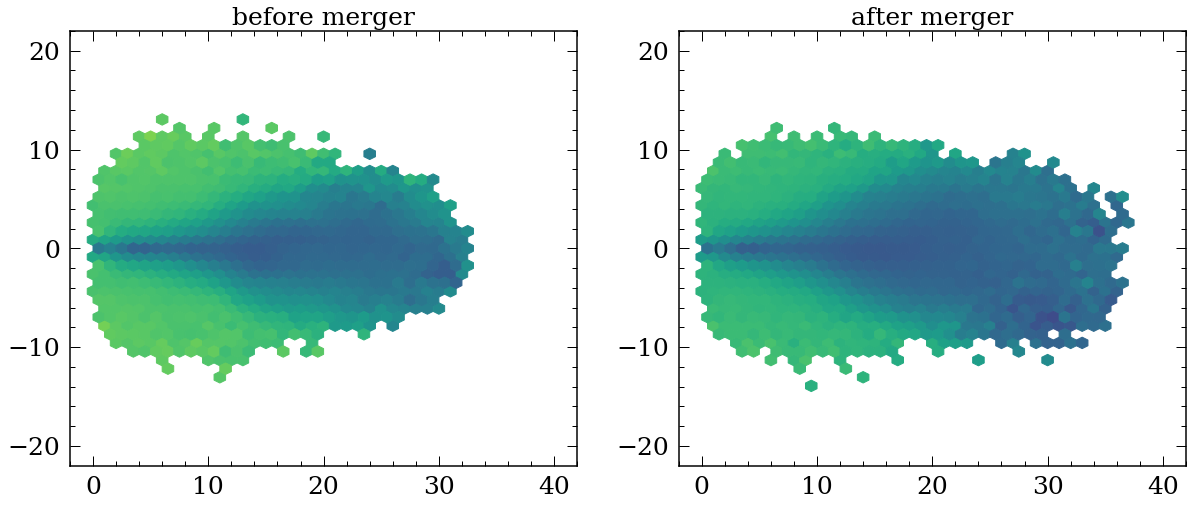

In [115]:
# plot age
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(data_034['R'],data_034['z'],C=data_034['age'],vmin=5,vmax=14, 
           gridsize=40,mincnt=10,extent=(0,40,-20,20))
plt.title('before merger',fontsize=25)

plt.subplot(1,2,2)
plt.hexbin(data_old['R'],data_old['z'],C=data_old['age'],vmin=5,vmax=14+3.811-3.016, gridsize=40,mincnt=10,extent=(0,40,-20,20))
plt.title('after merger',fontsize=25)
